

FEATURES:<br>

Brand: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

In [ ]:
!pip install xgboost

In [ ]:
pip install XlsxWriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


<B><h3>IMPORTING LIBRARIES</h3></B>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import re
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from math import sqrt
from sklearn import neighbors
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

<br><h2>DATA COLLECTION:</h2></br>


<h2><I> TRAIN DATA AND TEST DATA</I></H2><BR>

In [ ]:
# Read target variable data
train_y = pd.read_csv('/content/training_data_targets.csv')

# Rename the first column to 'Selling_Price'
train_y = train_y.rename(columns={train_y.columns[0]: 'Selling_Price'})

# Display the first few rows of the modified target variable data
print(train_y.head())


   Selling_Price
0           3.20
1          21.50
2           4.75
3           2.90
4           3.87


In [ ]:
# Read DataFrames
train_x = pd.read_csv('/content/training_data.csv')
train_y = pd.read_csv('/content/training_data_targets.csv')

# Concatenate DataFrames along columns
train_x['Selling_Price'] = train_y['Selling_Price']



#test data

test_x = pd.read_csv(r"/content/test_data.csv")
print(test_x)


                                              Brand   Location  Year  \
0                            Maruti Swift Dzire VDI  Hyderabad  2013   
1                     Mahindra Scorpio 1.99 S4 Plus      Kochi  2017   
2                            Mahindra XUV500 W8 2WD      Delhi  2014   
3                                Tata Indigo CS eVX       Pune  2016   
4                   Hyundai Santro GLS II - Euro II       Pune  2009   
..                                              ...        ...   ...   
597        Toyota Corolla Altis 2008-2013 1.8 VL AT     Mumbai  2008   
598                           Hyundai i10 Magna 1.2    Chennai  2012   
599                          Maruti Swift Dzire VDi     Jaipur  2010   
600  Mercedes-Benz E-Class 2015-2017 E250 Edition E  Ahmedabad  2016   
601                           Hyundai i10 Sportz AT  Ahmedabad  2012   

     Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0                69000    Diesel       Manual      Fir

In [ ]:
print(train_x)

                                             Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 35214    Petrol    Automatic     Second   23.1 kmpl   
1

In [ ]:
print(train_x.tail())

# We see that train data and targets are perfectly merged

                                             Brand   Location  Year  \
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
5412              27000    Petrol    Automatic      First  17.97 kmpl   
5413               9000    Diesel    Automatic      First  12.62 kmpl   
5414             140000    Diesel       Manual     Second   15.1 kmpl   
5415              76414    Diesel       Manual      First   25.8 kmpl   
5416              98000    Diesel       Manual     Second   12.8 kmpl   

       Engine     Power  Seats  Selling_Price  
5412  1498 CC  99.6 bhp    5.0           6.75  
5413  2198 CC   158 bhp    7.0        

In [ ]:
print(test_x)

                                              Brand   Location  Year  \
0                            Maruti Swift Dzire VDI  Hyderabad  2013   
1                     Mahindra Scorpio 1.99 S4 Plus      Kochi  2017   
2                            Mahindra XUV500 W8 2WD      Delhi  2014   
3                                Tata Indigo CS eVX       Pune  2016   
4                   Hyundai Santro GLS II - Euro II       Pune  2009   
..                                              ...        ...   ...   
597        Toyota Corolla Altis 2008-2013 1.8 VL AT     Mumbai  2008   
598                           Hyundai i10 Magna 1.2    Chennai  2012   
599                          Maruti Swift Dzire VDi     Jaipur  2010   
600  Mercedes-Benz E-Class 2015-2017 E250 Edition E  Ahmedabad  2016   
601                           Hyundai i10 Sportz AT  Ahmedabad  2012   

     Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0                69000    Diesel       Manual      Fir

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5416 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5379 non-null   float64
 11  Selling_Price      5417 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 508.0+ KB


In [ ]:
train_x.describe()

,Year,Kilometers_Driven,Seats,Selling_Price
count,5417.000000,5.417000e+03,5379.000000,5417.000000
mean,2013.363670,5.882682e+04,5.280350,9.453670
std,3.283659,9.511826e+04,0.811459,11.166658
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.329300e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.900000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
test_x.describe()

,Year,Kilometers_Driven,Seats
count,602.000000,602.000000,598.000000
mean,2013.308970,57942.551495,5.264214
std,3.143948,43329.671873,0.785392
min,2003.000000,1000.000000,2.000000
25%,2011.000000,32391.500000,5.000000
50%,2014.000000,52308.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,720000.000000,10.000000


In [ ]:
# Converting to Excel for verificatoin
train_x.to_excel('C:\\Users\\Ishanya\\Desktop\\DSML Project\\1\\data\\RAWDATA\\combined_data_altered.xlsx', index=False)

<b><h1>DATA CLEANING</h1></b>

<h2>Removing Null Values:</h2>

In [ ]:
train_x.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Selling_Price         0
dtype: int64

In [ ]:
test_x.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               2
Power                2
Seats                4
dtype: int64

In [ ]:
# Find and replace specific values with NaN for each column in train_x
replacement_dict = {
    '0.0 kmpl': np.NaN,  # Replace '0.0' with NaN in the 'Mileage' column
    'null bhp': np.NaN,  # Replace 'null' with NaN in the 'Power' column (assuming 'null' is a placeholder for missing values)
    0: np.NaN  # Replace 0 with NaN in other numeric columns, adjust this based on your dataset
}

train_x = train_x.replace(replacement_dict)

print(train_x)

                                             Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 35214    Petrol    Automatic     Second   23.1 kmpl   
1

In [ ]:
# Find and replace specific values with NaN for each column in test_x
replacement_dict = {
    '0.0 kmpl': np.NaN,  # Replace '0.0' with NaN in the 'Mileage' column
    'null bhp': np.NaN,  # Replace 'null' with NaN in the 'Power' column (assuming 'null' is a placeholder for missing values)
    0: np.NaN  # Replace 0 with NaN in other numeric columns, adjust this based on your dataset
}

test_x = test_x.replace(replacement_dict)

# Display the first 50 rows of the modified DataFrame
print(test_x.head(50))

                                               Brand    Location  Year  \
0                             Maruti Swift Dzire VDI   Hyderabad  2013   
1                      Mahindra Scorpio 1.99 S4 Plus       Kochi  2017   
2                             Mahindra XUV500 W8 2WD       Delhi  2014   
3                                 Tata Indigo CS eVX        Pune  2016   
4                    Hyundai Santro GLS II - Euro II        Pune  2009   
5                                Honda Accord 2.4 AT      Mumbai  2008   
6                                  Nissan Terrano XL      Mumbai  2014   
7                                    Maruti Ritz VDi      Jaipur  2013   
8                         Honda CR-V 2.4L 4WD AT AVN     Kolkata  2013   
9                                    Maruti Ritz VXI   Hyderabad  2012   
10              Audi A4 2.0 TDI 177 Bhp Premium Plus   Bangalore  2013   
11                                   Honda Brio E MT   Bangalore  2013   
12                              Ford F

In [ ]:

# Count of 0 values for each feature in train_x
count_of_zerosBrand = (train_x['Brand'] == 0).sum()
count_of_zerosLocation = (train_x['Location'] == 0).sum()
count_of_zerosYear = (train_x['Year'] == 0).sum()
count_of_zerosKilometers_Driven = (train_x['Kilometers_Driven'] == 0).sum()
count_of_zerosFuel_Type = (train_x['Fuel_Type'] == 0).sum()
count_of_zerosTransmission = (train_x['Transmission'] == 0).sum()
count_of_zerosOwner_Type = (train_x['Owner_Type'] == 0).sum()
count_of_zerosMileage = (train_x['Mileage'] == 0).sum()
count_of_zerosEngine = (train_x['Engine'] == 0).sum()
count_of_zerosPower = (train_x['Power'] == 0).sum()
count_of_zerosSeats = (train_x['Seats'] == 0).sum()
count_of_zerosSelling_Price = (train_x['Selling_Price'] == 0).sum()

# Print the counts
print("Count of 0 values in 'Brand' column:", count_of_zerosBrand)
print("Count of 0 values in 'Location' column:", count_of_zerosLocation)
print("Count of 0 values in 'Year' column:", count_of_zerosYear)
print("Count of 0 values in 'Kilometers_Driven' column:", count_of_zerosKilometers_Driven)
print("Count of 0 values in 'Fuel_Type' column:", count_of_zerosFuel_Type)
print("Count of 0 values in 'Transmission' column:", count_of_zerosTransmission)
print("Count of 0 values in 'Owner_Type' column:", count_of_zerosOwner_Type)
print("Count of 0 values in 'Mileage' column:", count_of_zerosMileage)
print("Count of 0 values in 'Engine' column:", count_of_zerosEngine)
print("Count of 0 values in 'Power' column:", count_of_zerosPower)
print("Count of 0 values in 'Seats' column:", count_of_zerosSeats)
print("Count of 0 values in 'Selling_Price' column:", count_of_zerosSelling_Price)

Count of 0 values in 'Brand' column: 0
Count of 0 values in 'Location' column: 0
Count of 0 values in 'Year' column: 0
Count of 0 values in 'Kilometers_Driven' column: 0
Count of 0 values in 'Fuel_Type' column: 0
Count of 0 values in 'Transmission' column: 0
Count of 0 values in 'Owner_Type' column: 0
Count of 0 values in 'Mileage' column: 0
Count of 0 values in 'Engine' column: 0
Count of 0 values in 'Power' column: 0
Count of 0 values in 'Seats' column: 0
Count of 0 values in 'Selling_Price' column: 0


In [ ]:
# Count of 0 values for each feature in test_x
count_of_zerosBrand = (test_x['Brand'] == 0).sum()
count_of_zerosLocation = (test_x['Location'] == 0).sum()
count_of_zerosYear = (test_x['Year'] == 0).sum()
count_of_zerosKilometers_Driven = (test_x['Kilometers_Driven'] == 0).sum()
count_of_zerosFuel_Type = (test_x['Fuel_Type'] == 0).sum()
count_of_zerosTransmission = (test_x['Transmission'] == 0).sum()
count_of_zerosOwner_Type = (test_x['Owner_Type'] == 0).sum()
count_of_zerosMileage = (test_x['Mileage'] == 0).sum()
count_of_zerosEngine = (test_x['Engine'] == 0).sum()
count_of_zerosPower = (test_x['Power'] == 0).sum()
count_of_zerosSeats = (test_x['Seats'] == 0).sum()


# Print the counts
print("Count of 0 values in 'Brand' column:", count_of_zerosBrand)
print("Count of 0 values in 'Location' column:", count_of_zerosLocation)
print("Count of 0 values in 'Year' column:", count_of_zerosYear)
print("Count of 0 values in 'Kilometers_Driven' column:", count_of_zerosKilometers_Driven)
print("Count of 0 values in 'Fuel_Type' column:", count_of_zerosFuel_Type)
print("Count of 0 values in 'Transmission' column:", count_of_zerosTransmission)
print("Count of 0 values in 'Owner_Type' column:", count_of_zerosOwner_Type)
print("Count of 0 values in 'Mileage' column:", count_of_zerosMileage)
print("Count of 0 values in 'Engine' column:", count_of_zerosEngine)
print("Count of 0 values in 'Power' column:", count_of_zerosPower)
print("Count of 0 values in 'Seats' column:", count_of_zerosSeats)


Count of 0 values in 'Brand' column: 0
Count of 0 values in 'Location' column: 0
Count of 0 values in 'Year' column: 0
Count of 0 values in 'Kilometers_Driven' column: 0
Count of 0 values in 'Fuel_Type' column: 0
Count of 0 values in 'Transmission' column: 0
Count of 0 values in 'Owner_Type' column: 0
Count of 0 values in 'Mileage' column: 0
Count of 0 values in 'Engine' column: 0
Count of 0 values in 'Power' column: 0
Count of 0 values in 'Seats' column: 0


In [ ]:
train_x.isnull().sum()

Brand                  0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               57
Engine                34
Power                129
Seats                 39
Selling_Price          0
dtype: int64

In [ ]:
test_x.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              13
Engine                2
Power                14
Seats                 4
dtype: int64

In [ ]:
# Removing units from Mileage, Engine, and Power columns in the 'train_x' DataFrame
train_x['Mileage'] = train_x['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
train_x['Mileage'] = train_x['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

train_x['Engine'] = train_x['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

train_x['Power'] = train_x['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [ ]:
# Removing units from Mileage, Engine, and Power columns in the 'test_x' DataFrame
test_x['Mileage'] = test_x['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
test_x['Mileage'] = test_x['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

test_x['Engine'] = test_x['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

test_x['Power'] = test_x['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

def impute_with_knn(data, columns):
    # Initialize KNNImputer
    imputer = KNNImputer(n_neighbors=5)

    # Perform KNN imputation for the specified columns
    data[columns] = imputer.fit_transform(data[columns])

    # Check if there are any missing values left in the columns after imputation
    missing_values = data[columns].isnull().sum()

    for column in columns:
        print(f"Missing values in {column} column after KNN imputation: {missing_values[column]}")

# Columns to impute with KNN
columns_to_impute_knn = ['Mileage', 'Engine', 'Power']

# Impute missing values using KNN for each specified column
impute_with_knn(train_x, columns_to_impute_knn)


columns_to_impute_knn_test = ['Mileage', 'Engine', 'Power']

impute_with_knn(test_x, columns_to_impute_knn_test)

Missing values in Mileage column after KNN imputation: 0
Missing values in Engine column after KNN imputation: 0
Missing values in Power column after KNN imputation: 0
Missing values in Mileage column after KNN imputation: 0
Missing values in Engine column after KNN imputation: 0
Missing values in Power column after KNN imputation: 0


In [ ]:
# Function for imputing missing values with mode FOR SEATS AS IT MUST BE
def impute_with_mode(data, column):
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    print(f"Mode of {column}: {mode_value}")

    # Check if there are any missing values left in the column after imputation
    missing_values = data[column].isnull().sum()
    print(f"Missing values in {column} column after imputation: {missing_values}")

# Column to impute with mode
column_to_impute_mode = 'Seats'

# Impute missing values with mode for the specified column
impute_with_mode(train_x, column_to_impute_mode)

Mode of Seats: 5.0
Missing values in Seats column after imputation: 0


In [ ]:
# Function for imputing missing values with mode
def impute_with_mode(data, column):
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    print(f"Mode of {column}: {mode_value}")

    # Check if there are any missing values left in the column after imputation
    missing_values = data[column].isnull().sum()
    print(f"Missing values in {column} column after imputation: {missing_values}")

# Column to impute with mode
column_to_impute_mode = 'Seats'

# Impute missing values with mode for the specified column in the test_x dataset
impute_with_mode(test_x, column_to_impute_mode)

Mode of Seats: 5.0
Missing values in Seats column after imputation: 0


In [ ]:
#converting into float
train_x['Mileage']=train_x['Mileage'].astype('float')

#converting into float
train_x['Engine']=train_x['Engine'].astype('float')

#converting into float
train_x['Power']=train_x['Power'].astype('float')

print(train_x.dtypes)

Brand                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Selling_Price        float64
dtype: object


In [ ]:
# Converting 'Mileage' to float
test_x['Mileage'] = test_x['Mileage'].astype('float')

# Converting 'Engine' to float
test_x['Engine'] = test_x['Engine'].astype('float')

# Converting 'Power' to float
test_x['Power'] = test_x['Power'].astype('float')

# Display the updated data types
print(test_x.dtypes)


Brand                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [ ]:
#Spliting Brand1 into Brand,Model and Version
train_x['Brand1']=train_x['Brand'].str.split(' ').str[0]
train_x['Model']=train_x['Brand'].str.split(' ').str[1]
train_x['Version']=train_x['Brand'].str.split(' ').str[2:7].str.join(" ")
print(train_x)

                                             Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 35214    Petrol    Automatic     Second    23.10   

In [ ]:
test_x['Brand1'] = test_x['Brand'].str.split(' ').str[0]
test_x['Model'] = test_x['Brand'].str.split(' ').str[1]
test_x['Version'] = test_x['Brand'].str.split(' ').str[2:7].str.join(" ")
print(test_x)


                                              Brand   Location  Year  \
0                            Maruti Swift Dzire VDI  Hyderabad  2013   
1                     Mahindra Scorpio 1.99 S4 Plus      Kochi  2017   
2                            Mahindra XUV500 W8 2WD      Delhi  2014   
3                                Tata Indigo CS eVX       Pune  2016   
4                   Hyundai Santro GLS II - Euro II       Pune  2009   
..                                              ...        ...   ...   
597        Toyota Corolla Altis 2008-2013 1.8 VL AT     Mumbai  2008   
598                           Hyundai i10 Magna 1.2    Chennai  2012   
599                          Maruti Swift Dzire VDi     Jaipur  2010   
600  Mercedes-Benz E-Class 2015-2017 E250 Edition E  Ahmedabad  2016   
601                           Hyundai i10 Sportz AT  Ahmedabad  2012   

     Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
0                69000    Diesel       Manual      First  23.400

In [ ]:
# Check unique values in the 'Mileage' column
unique_mileage_values = train_x['Mileage'].unique()
print("Unique values in 'Mileage':", unique_mileage_values)

# Check unique values in the 'Engine' column
unique_engine_values = train_x['Engine'].unique()
print("Unique values in 'Engine':", unique_engine_values)

# Check unique values in the 'Power' column
unique_power_values = train_x['Power'].unique()
print("Unique values in 'Power':", unique_power_values)

# Check unique values in the 'Seats' column
unique_seats_values = train_x['Seats'].unique()
print("Unique values in 'Seats':", unique_seats_values)


Unique values in 'Mileage': [23.1        14.16       23.59       26.2        20.51       22.54
 16.8        12.05       25.2        18.88       15.5        18.5
 16.5        14.         18.3        14.84       17.         21.1
 17.9        19.3        25.1        17.05       16.95       13.5
 17.4        17.7        11.36       12.8        12.4        18.6
 24.4        17.57       17.6        16.36       18.49       14.07
 17.2        17.54       21.76       15.04       24.07       22.95
 13.17       16.         13.         20.36       21.7        18.9
 17.8        19.         13.6        15.1        19.4        25.8
 14.28       20.77       15.41       16.46       19.7        23.9
 22.9        24.3        22.32       21.9        17.5        22.3
 18.1        25.4        16.47       20.54       17.11       19.83
 16.55       16.1        23.08       12.65       19.01       21.5
 23.         16.25       15.         15.73       20.         17.85
 20.14       12.07       28.4        19.08 

In [ ]:
# Check unique values in the 'Mileage' column
unique_mileage_values_test = test_x['Mileage'].unique()
print("Unique values in 'Mileage' (test_x):", unique_mileage_values_test)

# Check unique values in the 'Engine' column
unique_engine_values_test = test_x['Engine'].unique()
print("Unique values in 'Engine' (test_x):", unique_engine_values_test)

# Check unique values in the 'Power' column
unique_power_values_test = test_x['Power'].unique()
print("Unique values in 'Power' (test_x):", unique_power_values_test)

# Check unique values in the 'Seats' column
unique_seats_values_test = test_x['Seats'].unique()
print("Unique values in 'Seats' (test_x):", unique_seats_values_test)

Unique values in 'Mileage' (test_x): [23.4        15.4        15.1        25.         18.37952462 11.7
 13.24       23.2        12.         21.1        17.11       19.4
 20.         23.1        26.6        17.8        18.6        12.7
 19.5        21.4        28.09       18.5        21.5        17.
 16.55       24.3        19.16       13.58       18.12       15.
 15.3        19.2        13.5        21.38       13.7        23.59
 22.69       20.51       19.6        28.4        12.8        19.27
 10.93       19.01       15.26       18.88       16.95       20.5
 20.54       16.         11.5        17.01       13.22       12.99
 17.2        12.9        18.548      16.258      20.77       19.08
 16.82        8.7        25.2        18.         16.3        16.2
 20.45       17.57       16.52       16.47       18.9        12.07
 13.         18.15       15.04       22.48       22.9        22.5
 15.6        20.37       24.         18.44       22.7        14.8
 14.4        25.6        17.7       

In [ ]:
train=train_x
print(train)

                                             Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 35214    Petrol    Automatic     Second    23.10   

In [ ]:
test=test_x
print(test)

                                              Brand   Location  Year  \
0                            Maruti Swift Dzire VDI  Hyderabad  2013   
1                     Mahindra Scorpio 1.99 S4 Plus      Kochi  2017   
2                            Mahindra XUV500 W8 2WD      Delhi  2014   
3                                Tata Indigo CS eVX       Pune  2016   
4                   Hyundai Santro GLS II - Euro II       Pune  2009   
..                                              ...        ...   ...   
597        Toyota Corolla Altis 2008-2013 1.8 VL AT     Mumbai  2008   
598                           Hyundai i10 Magna 1.2    Chennai  2012   
599                          Maruti Swift Dzire VDi     Jaipur  2010   
600  Mercedes-Benz E-Class 2015-2017 E250 Edition E  Ahmedabad  2016   
601                           Hyundai i10 Sportz AT  Ahmedabad  2012   

     Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
0                69000    Diesel       Manual      First  23.400

In [ ]:
unique_Brand1_values = train['Brand1'].unique()
print("Unique values in 'Brand1':", unique_Brand1_values)

Unique values in 'Brand1': ['Maruti' 'Audi' 'Toyota' 'Hyundai' 'Mahindra' 'BMW' 'Honda' 'Chevrolet'
 'Mercedes-Benz' 'Tata' 'Jaguar' 'Skoda' 'Mitsubishi' 'Ford' 'Renault'
 'Volkswagen' 'Datsun' 'Nissan' 'Land' 'Porsche' 'Fiat' 'Volvo' 'Jeep'
 'Mini' 'Force' 'Bentley' 'ISUZU' 'Isuzu' 'Lamborghini']


In [ ]:
#merging Isuzu and ISUZU
train.Brand1[train.Brand1=='Isuzu']='ISUZU'

In [ ]:
# Get the list of column names in test_x
test_columns = test_x.columns

# Check if unique categories in each column of test_x are a subset of train_x
for column_name in test_columns:
    is_subset = set(test_x[column_name].unique()).issubset(set(train_x[column_name].unique()))

    if is_subset:
        print(f"Categories in {column_name} of test_x are a subset of train_x.")
    else:
        print(f"Categories in {column_name} of test_x are not a subset of train_x.")


Categories in Brand of test_x are not a subset of train_x.
Categories in Location of test_x are a subset of train_x.
Categories in Year of test_x are a subset of train_x.
Categories in Kilometers_Driven of test_x are not a subset of train_x.
Categories in Fuel_Type of test_x are a subset of train_x.
Categories in Transmission of test_x are a subset of train_x.
Categories in Owner_Type of test_x are a subset of train_x.
Categories in Mileage of test_x are not a subset of train_x.
Categories in Engine of test_x are not a subset of train_x.
Categories in Power of test_x are not a subset of train_x.
Categories in Seats of test_x are a subset of train_x.
Categories in Brand1 of test_x are not a subset of train_x.
Categories in Model of test_x are not a subset of train_x.
Categories in Version of test_x are not a subset of train_x.


In [ ]:
# Convert brand names to lowercase for consistency
unique_values_train1 = train['Brand'].str.lower().unique()
unique_values_test1 = test['Brand'].str.lower().unique()

# Find the brand names that are not common
not_common_brands_train1 = set(unique_values_train1) - set(unique_values_test1)
not_common_brands_test1 = set(unique_values_test1) - set(unique_values_train1)

print("Brand names not common in the training dataset:")
print(not_common_brands_train1)

print("\nBrand names not common in the test dataset:")
print(not_common_brands_test1)

# Count occurrences of not common brand names in the training dataset
count_not_common_train1 = train['Brand'].str.lower().isin(not_common_brands_train1).sum()
print("\nCount of occurrences in the training dataset:", count_not_common_train1)

# Count occurrences of not common brand names in the test dataset
count_not_common_test1 = test['Brand'].str.lower().isin(not_common_brands_test1).sum()
print("Count of occurrences in the test dataset:", count_not_common_test1)


Brand names not common in the training dataset:
{'mahindra ssangyong rexton rx5', 'skoda fabia 1.2 mpi classic', 'ford fiesta 1.6 zxi abs', 'maruti dzire amt zdi plus', 'porsche panamera 2010 2013 4s', 'hyundai verna crdi sx abs', 'volvo xc60 d4 summum', 'honda brio 1.2 s option mt', 'maruti omni mpi cargo bsiv', 'tata new safari dicor 2.2 vx 4x4', 'bmw 3 series 320d luxury plus', 'fiat linea t jet', 'fiat linea 1.3 emotion', 'mahindra bolero vlx bs iv', 'fiat grande punto 1.3 emotion pack (diesel)', 'audi a6 2011-2015 35 tfsi technology', 'audi tt 40 tfsi', 'hyundai i20 2015-2017 magna 1.2', 'skoda fabia 1.2 petrol active', 'ford figo aspire 1.2 ti-vct titanium', 'maruti swift dzire ldi bsiv', 'maruti alto 800 2016-2019 vxi', 'renault kwid rxt', 'maruti alto 800 cng lxi', 'tata manza aura safire', 'renault duster 85ps diesel rxl optional with nav', 'mercedes-benz glc 220', 'tata indigo gle', 'volkswagen vento 1.2 tsi highline at', 'chevrolet sail hatchback 1.2 ls', 'hyundai i10 asta 1

In [ ]:
unique_Brand1_values1 = test['Brand1'].unique()
print("Unique values in 'Brand1':", unique_Brand1_values1)

Unique values in 'Brand1': ['Maruti' 'Mahindra' 'Tata' 'Hyundai' 'Honda' 'Nissan' 'Audi' 'Ford'
 'Land' 'Volkswagen' 'BMW' 'Toyota' 'Chevrolet' 'Mitsubishi'
 'Mercedes-Benz' 'Renault' 'Skoda' 'Volvo' 'Mini' 'Jeep' 'Datsun' 'Jaguar'
 'Porsche' 'Smart' 'Ambassador' 'Fiat']


In [ ]:
# We see that the brand1 names aren not consistent in both the train and test data!

# Check if unique values in 'Brand1' are the same between training and test datasets
unique_values_train = set(train['Brand1'].str.lower().unique())
unique_values_test = set(test['Brand1'].str.lower().unique())

if unique_values_train == unique_values_test:
    print("Unique values in 'Brand1' are the same between training and test datasets.")
else:
    print("Unique values in 'Brand1' are different between training and test datasets.")


    # If different, you might want to inspect the specific differences
    print("Unique values in training dataset:", unique_values_train)
    print("Unique values in test dataset:", unique_values_test)



Unique values in 'Brand1' are different between training and test datasets.
Unique values in training dataset: {'jeep', 'mahindra', 'mitsubishi', 'bmw', 'isuzu', 'hyundai', 'chevrolet', 'nissan', 'skoda', 'force', 'mercedes-benz', 'audi', 'jaguar', 'volvo', 'honda', 'mini', 'volkswagen', 'lamborghini', 'porsche', 'maruti', 'ford', 'bentley', 'datsun', 'renault', 'land', 'toyota', 'fiat', 'tata'}
Unique values in test dataset: {'jeep', 'mahindra', 'mitsubishi', 'bmw', 'hyundai', 'chevrolet', 'nissan', 'skoda', 'mercedes-benz', 'audi', 'ambassador', 'jaguar', 'volvo', 'honda', 'mini', 'volkswagen', 'porsche', 'maruti', 'ford', 'datsun', 'renault', 'land', 'toyota', 'fiat', 'smart', 'tata'}


In [ ]:
# Convert brand names to lowercase for consistency
unique_values_train = train['Brand1'].str.lower().unique()
unique_values_test = test['Brand1'].str.lower().unique()

# Find the brand names that are not common
not_common_brands_train = set(unique_values_train) - set(unique_values_test)
not_common_brands_test = set(unique_values_test) - set(unique_values_train)

print("Brand names not common in the training dataset:")
print(not_common_brands_train)

print("\nBrand names not common in the test dataset:")
print(not_common_brands_test)

# Count occurrences of not common brand names in the training dataset
count_not_common_train = train['Brand1'].str.lower().isin(not_common_brands_train).sum()
print("\nCount of occurrences in the training dataset:", count_not_common_train)

# Count occurrences of not common brand names in the test dataset
count_not_common_test = test['Brand1'].str.lower().isin(not_common_brands_test).sum()
print("Count of occurrences in the test dataset:", count_not_common_test)

Brand names not common in the training dataset:
{'lamborghini', 'force', 'bentley', 'isuzu'}

Brand names not common in the test dataset:
{'ambassador', 'smart'}

Count of occurrences in the training dataset: 8
Count of occurrences in the test dataset: 2


In [ ]:
# Convert brand names to lowercase for consistency
train['Brand1'] = train['Brand1'].str.lower()
test['Brand1'] = test['Brand1'].str.lower()

# Find the common brand names
common_brands = set(train['Brand1'].unique()).intersection(set(test['Brand1'].unique()))

# Convert common brands to lowercase
common_brands_lower = set(brand.lower() for brand in common_brands)

# Drop rows in the test dataset where 'Brand1' is 'ambassador' or 'smart'
test.drop(test[test['Brand1'].str.lower().isin(['ambassador', 'smart'])].index, inplace=True)

# Update the count after removal
count_after_removal_test = test.shape[0]

print("\nCount of rows after removal in the test dataset:", count_after_removal_test)



Count of rows after removal in the test dataset: 600


In [ ]:
train['Age']=2020-train['Year']

In [ ]:
test['Age']=2020-test['Year']

In [ ]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version,Age
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20,maruti,Celerio,VXI AMT,6
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50,audi,Q5,2.0 TDI,7
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75,toyota,Etios,VXD,8
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.20,998.0,58.20,5.0,2.90,maruti,Wagon,R LXI CNG,8
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87,maruti,Wagon,R AMT VXI,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75,nissan,Sunny,2011-2014 XL AT Special Edition,5
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90,ford,Endeavour,2.2 Titanium AT 4X2,1
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00,mahindra,XUV500,W8 2WD,7
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95,honda,Amaze,S i-Dtech,6


In [ ]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version,Age
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.400000,1248.000000,74.000000,5.0,maruti,Swift,Dzire VDI,7
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.400000,1997.000000,120.000000,7.0,mahindra,Scorpio,1.99 S4 Plus,3
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.100000,2179.000000,140.000000,7.0,mahindra,XUV500,W8 2WD,6
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.000000,1396.000000,69.010000,5.0,tata,Indigo,CS eVX,4
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,18.379525,1625.773333,114.737066,5.0,hyundai,Santro,GLS II - Euro II,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.530000,1794.000000,138.100000,5.0,toyota,Corolla,Altis 2008-2013 1.8 VL AT,12
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.360000,1197.000000,78.900000,5.0,hyundai,i10,Magna 1.2,8
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.300000,1248.000000,73.900000,5.0,maruti,Swift,Dzire VDi,10
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.000000,2143.000000,204.000000,5.0,mercedes-benz,E-Class,2015-2017 E250 Edition E,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5417 non-null   float64
 8   Engine             5417 non-null   float64
 9   Power              5417 non-null   float64
 10  Seats              5417 non-null   float64
 11  Selling_Price      5417 non-null   float64
 12  Brand1             5417 non-null   object 
 13  Model              5417 non-null   object 
 14  Version            5417 non-null   object 
 15  Age                5417 non-null   int64  
dtypes: float64(5), int64(3),

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 601
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              600 non-null    object 
 1   Location           600 non-null    object 
 2   Year               600 non-null    int64  
 3   Kilometers_Driven  600 non-null    int64  
 4   Fuel_Type          600 non-null    object 
 5   Transmission       600 non-null    object 
 6   Owner_Type         600 non-null    object 
 7   Mileage            600 non-null    float64
 8   Engine             600 non-null    float64
 9   Power              600 non-null    float64
 10  Seats              600 non-null    float64
 11  Brand1             600 non-null    object 
 12  Model              600 non-null    object 
 13  Version            600 non-null    object 
 14  Age                600 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 75.0+ KB


<br><H1> EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION:</H1><br>

Skewness: 3.383963
Kurtosis: 17.793260


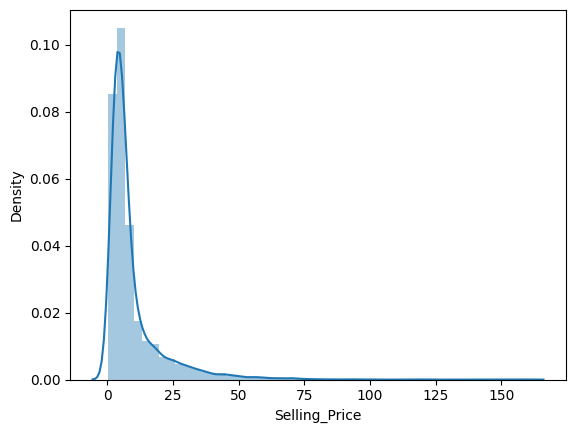

In [ ]:
import seaborn as sns

# Plotting the distribution of 'Price' in the 'train' dataset
sns.distplot(train['Selling_Price'])

# Printing skewness and kurtosis
print("Skewness: %f" % train['Selling_Price'].skew())
print("Kurtosis: %f" % train['Selling_Price'].kurt())

#Positive skewness (3.38) indicates a right-leaning distribution for 'Selling Price,' suggesting a concentration of lower-priced cars with a few significantly higher-priced outliers.

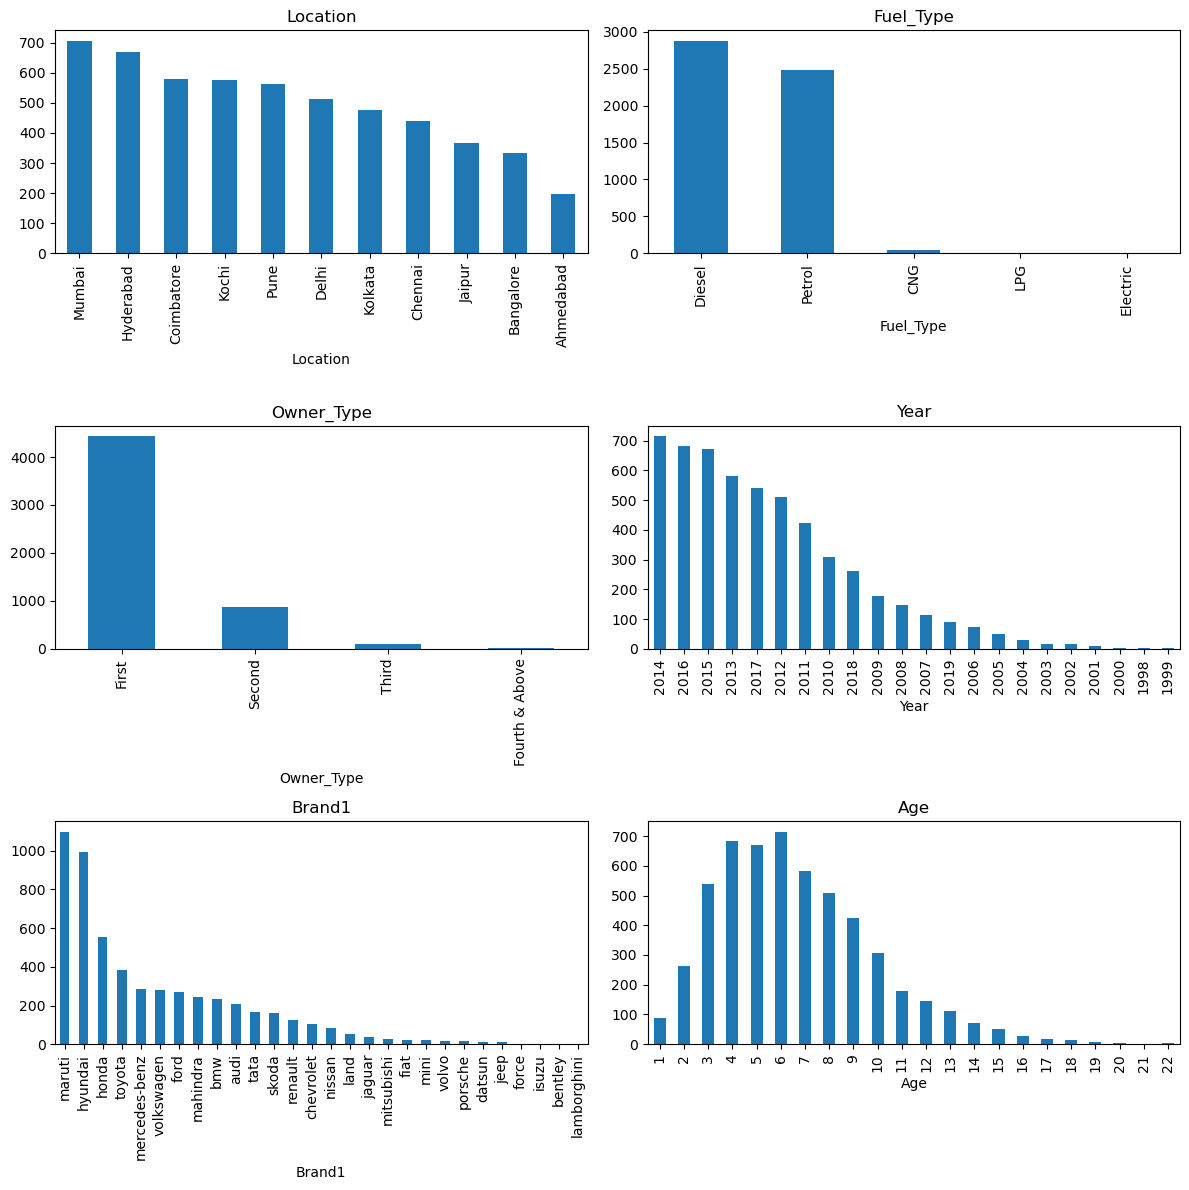

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Location
train['Location'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Location')

# Plot 2: Fuel_Type
train['Fuel_Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Fuel_Type')

# Plot 3: Owner_Type
train['Owner_Type'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Owner_Type')

# Plot 4: Year
train['Year'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Year')

# Plot 5: Brand1
train['Brand1'].value_counts().plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Brand1')

# Plot 6: Age
train['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_title('Age')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


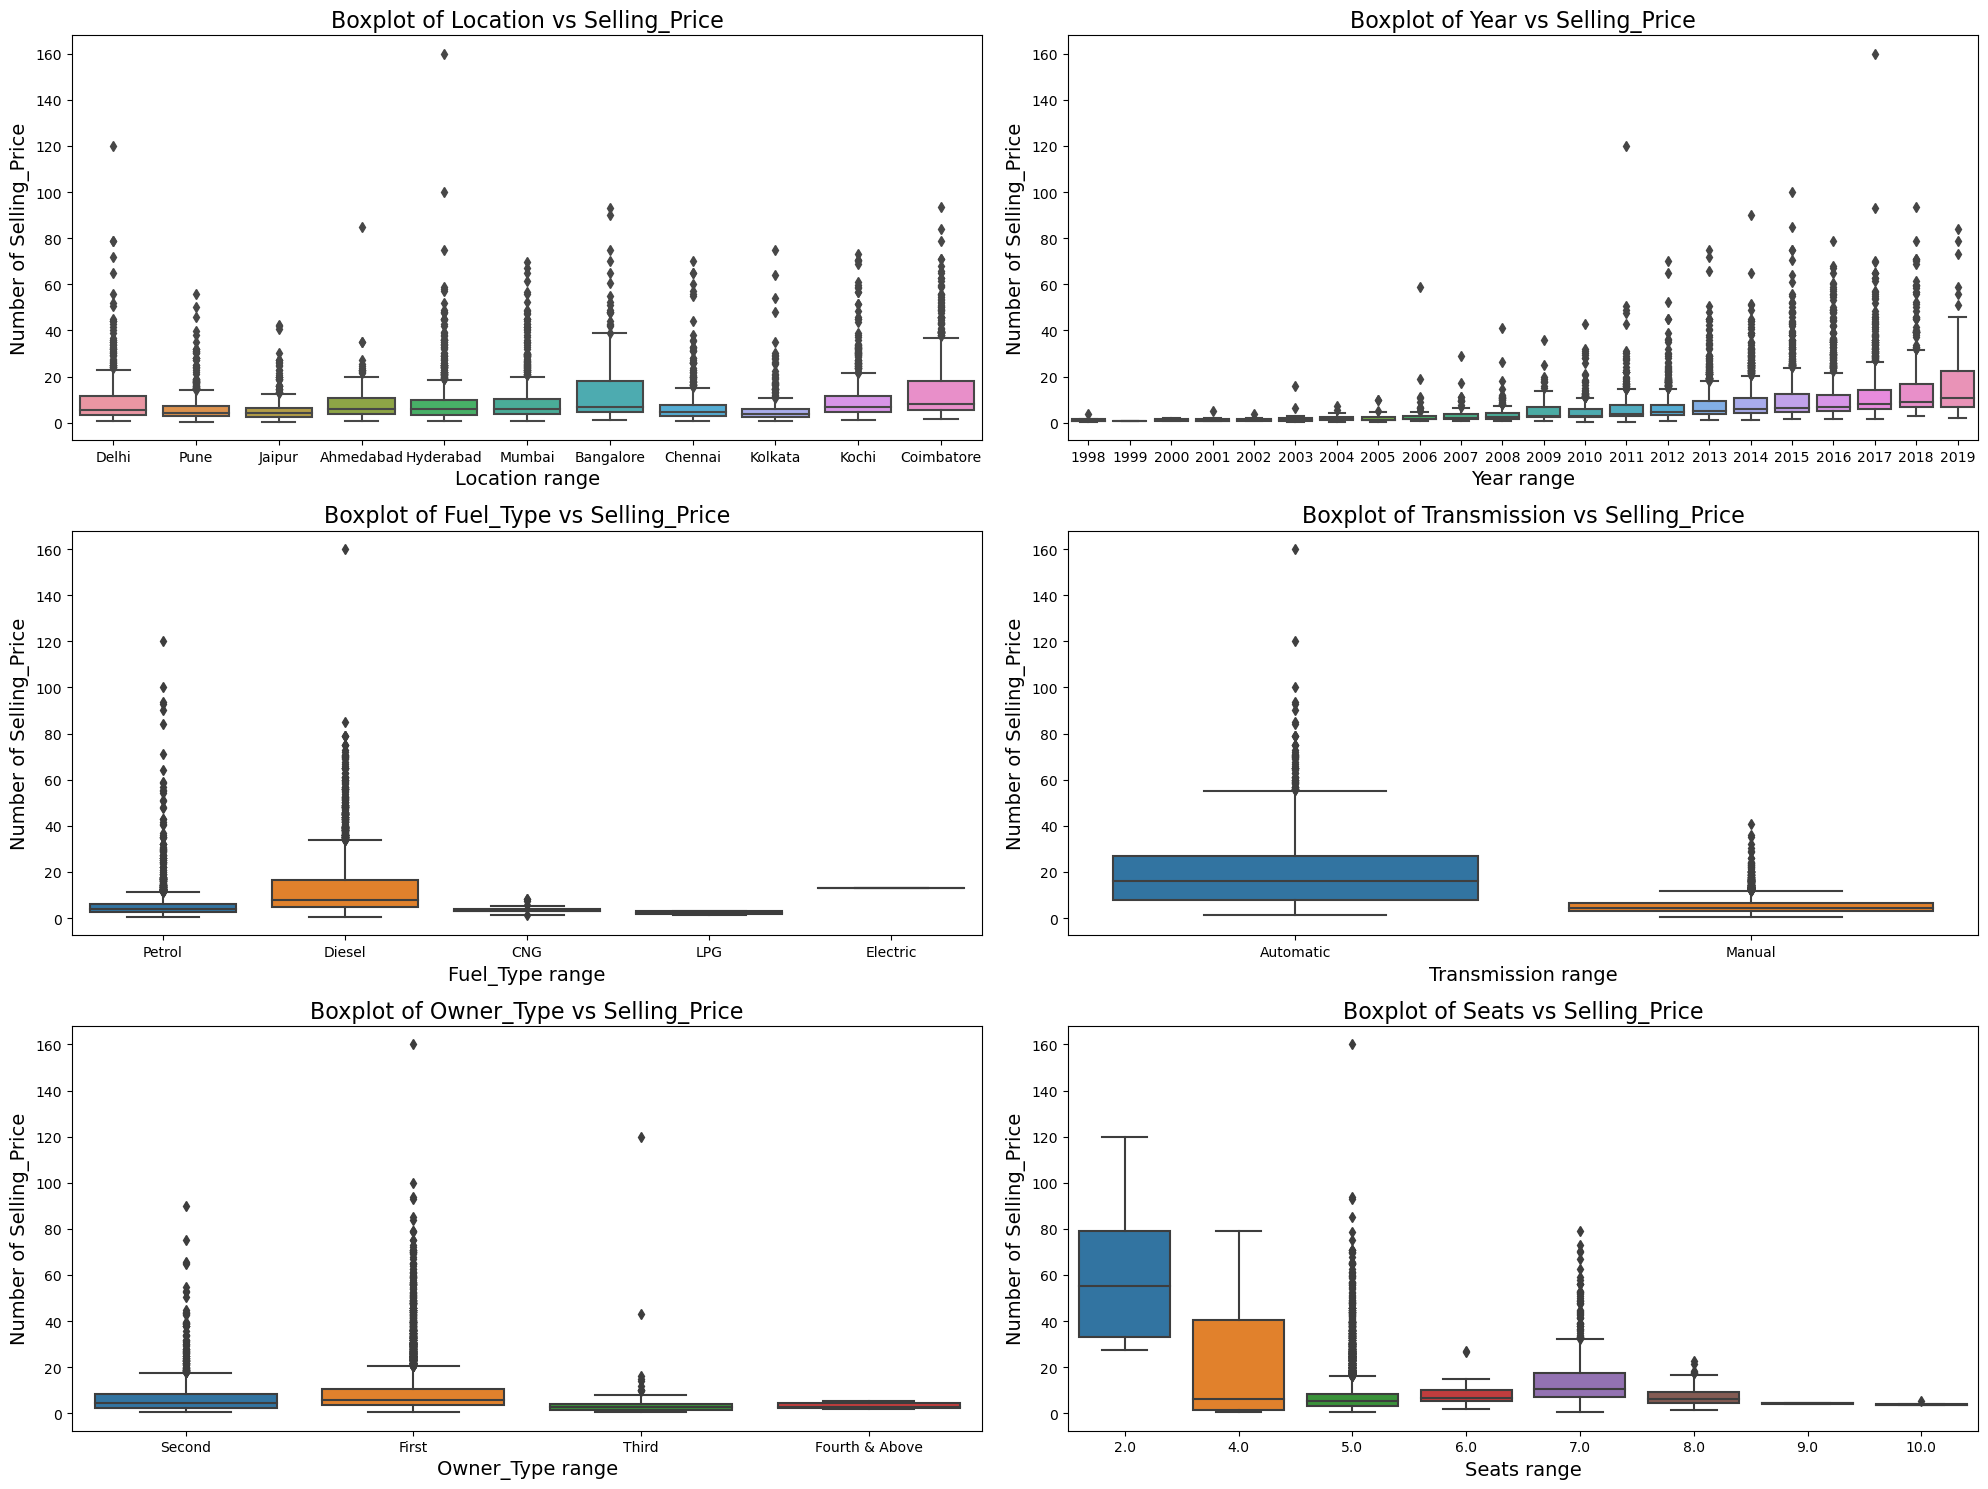

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Selling_Price' is the column you want to visualize
xprops = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
yprop = 'Selling_Price'

plt.figure(figsize=(20, 15))

for i, xprop in enumerate(xprops, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train, x=xprop, y=yprop)
    plt.xlabel('{} range'.format(xprop), size=14)
    plt.ylabel('Number of {}'.format(yprop), size=14)
    plt.title('Boxplot of {} vs {}'.format(xprop, yprop), size=16)

plt.tight_layout()
plt.show()



<Axes: xlabel='Kilometers_Driven', ylabel='Selling_Price'>

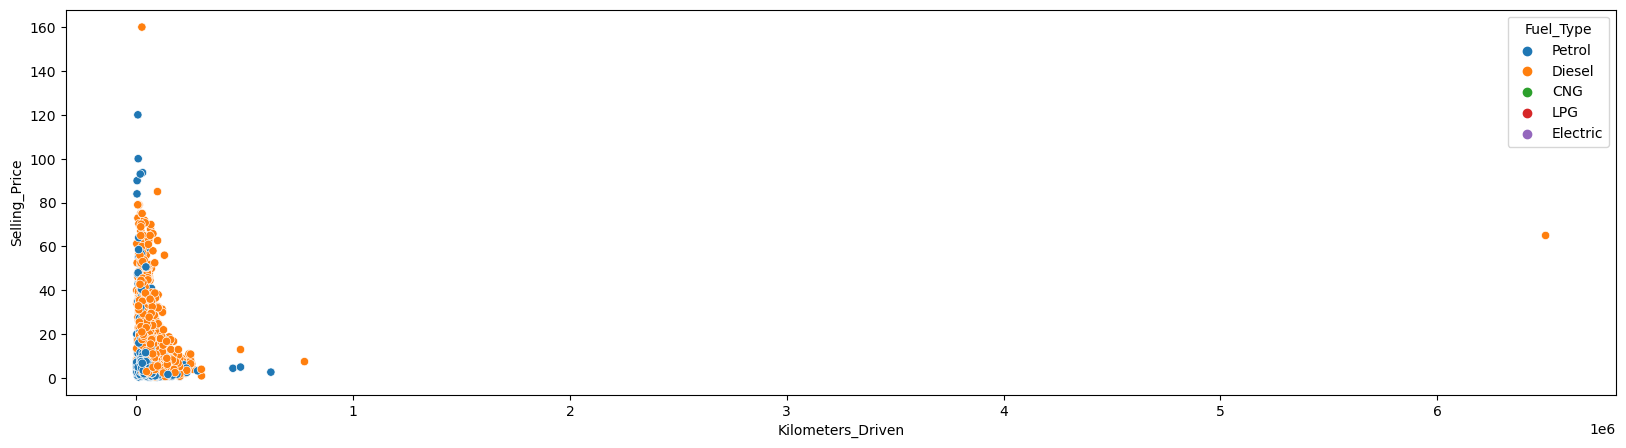

In [ ]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Kilometers_Driven',y='Selling_Price',data=train, hue='Fuel_Type')

<Axes: xlabel='Kilometers_Driven', ylabel='Selling_Price'>

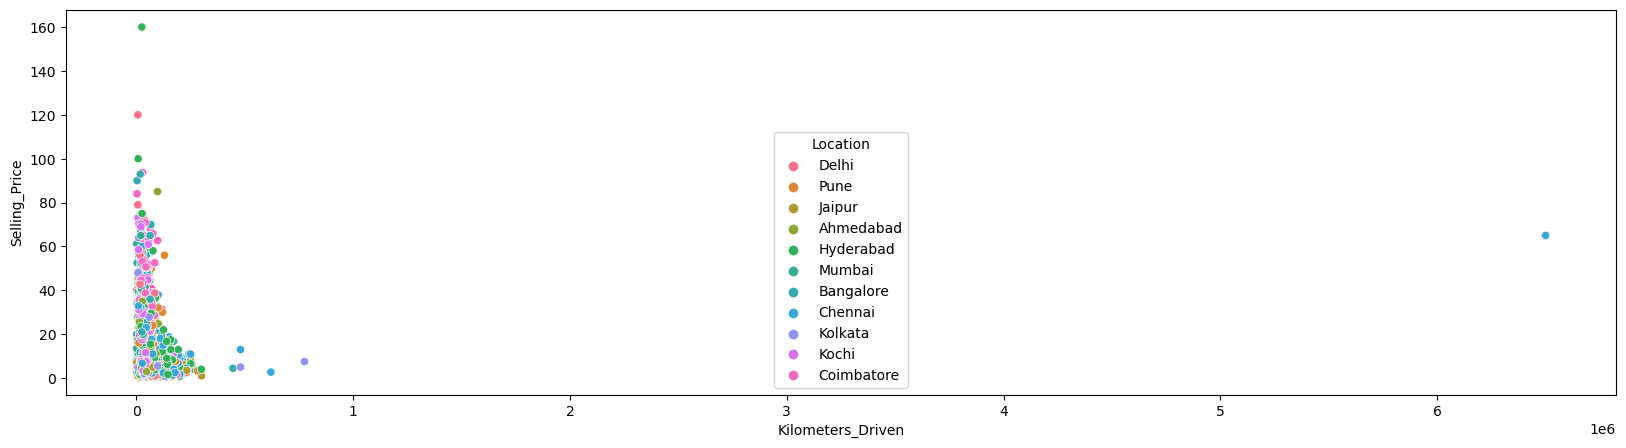

In [ ]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Kilometers_Driven',y='Selling_Price',data=train, hue='Location')

<Axes: xlabel='Mileage', ylabel='Selling_Price'>

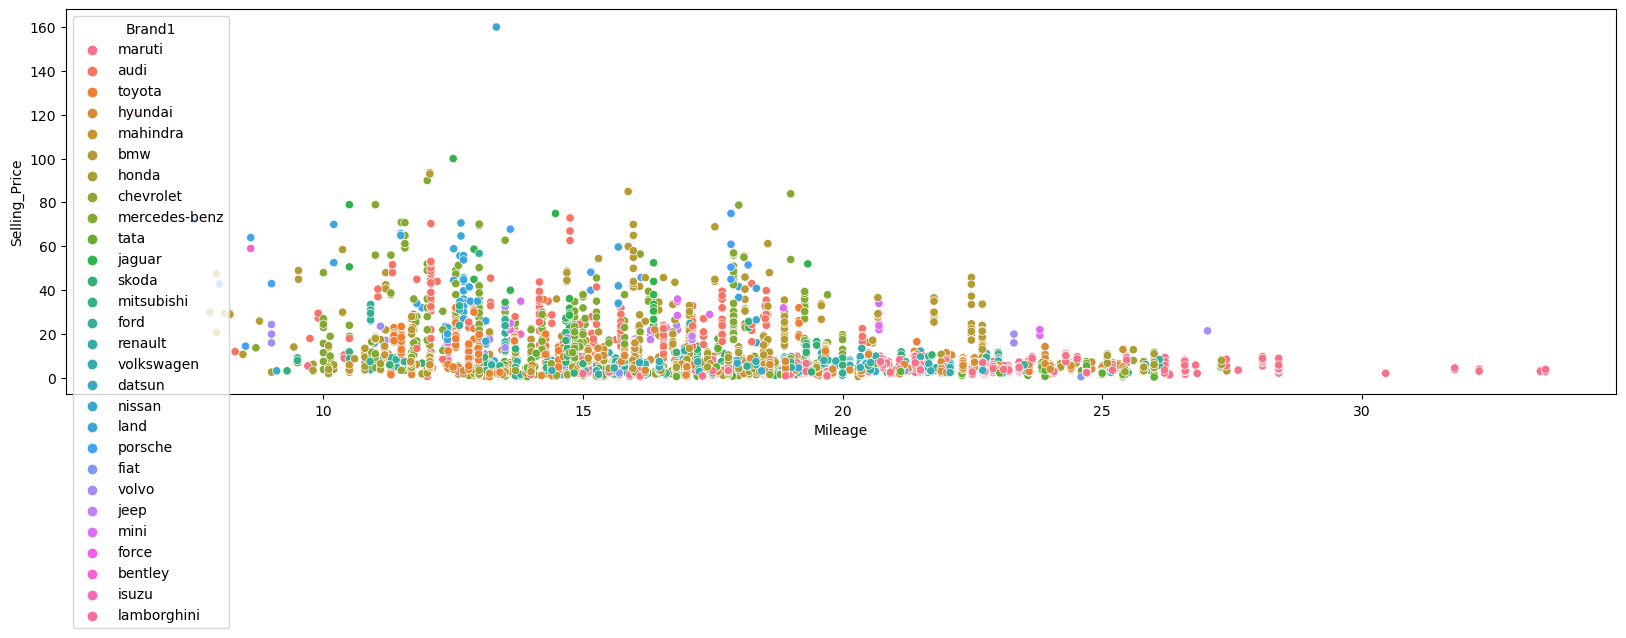

In [ ]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Mileage',y='Selling_Price',data=train, hue='Brand1')

<Axes: xlabel='Year', ylabel='Density'>

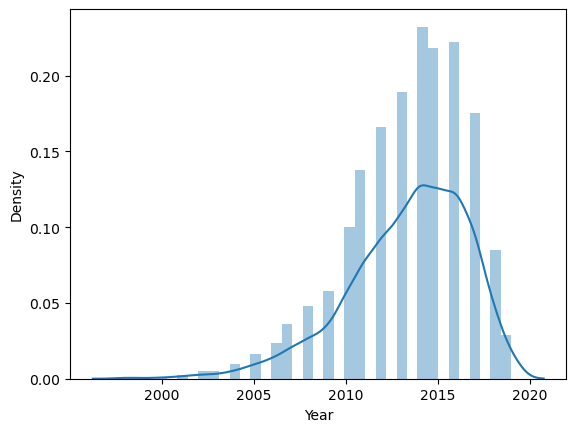

In [ ]:
sn.distplot(train["Year"])

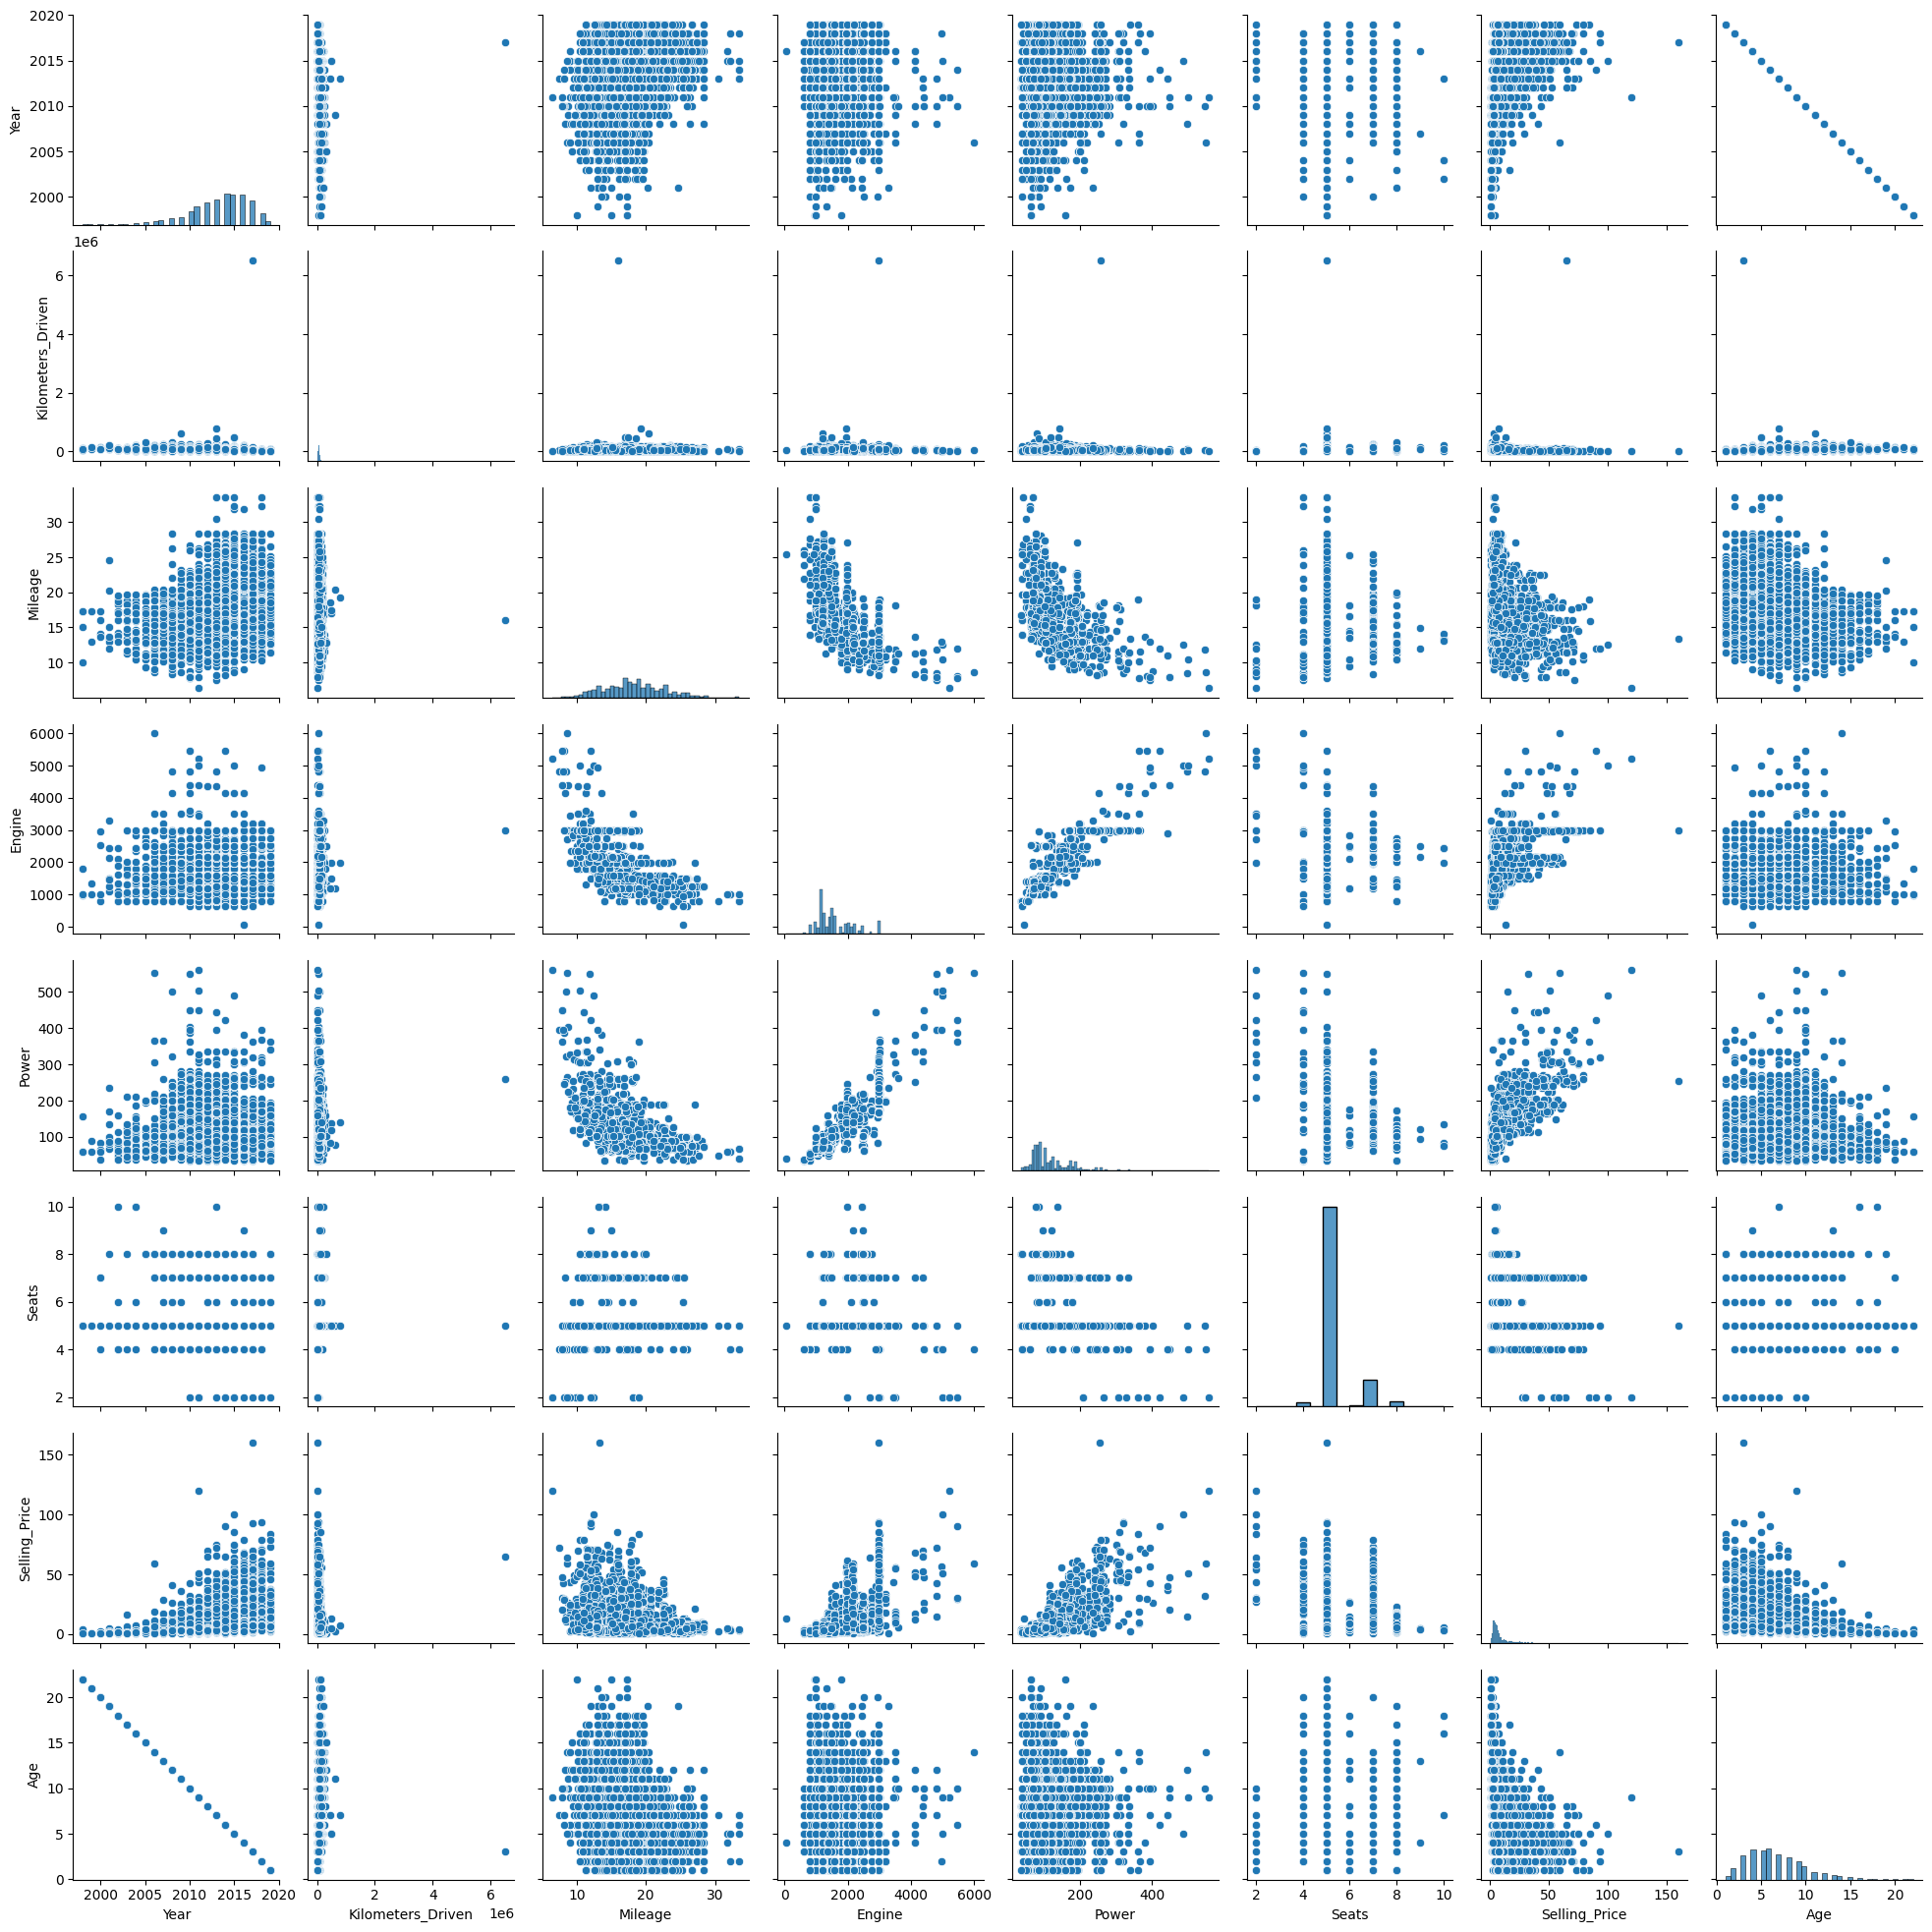

In [ ]:
sn.pairplot(train)

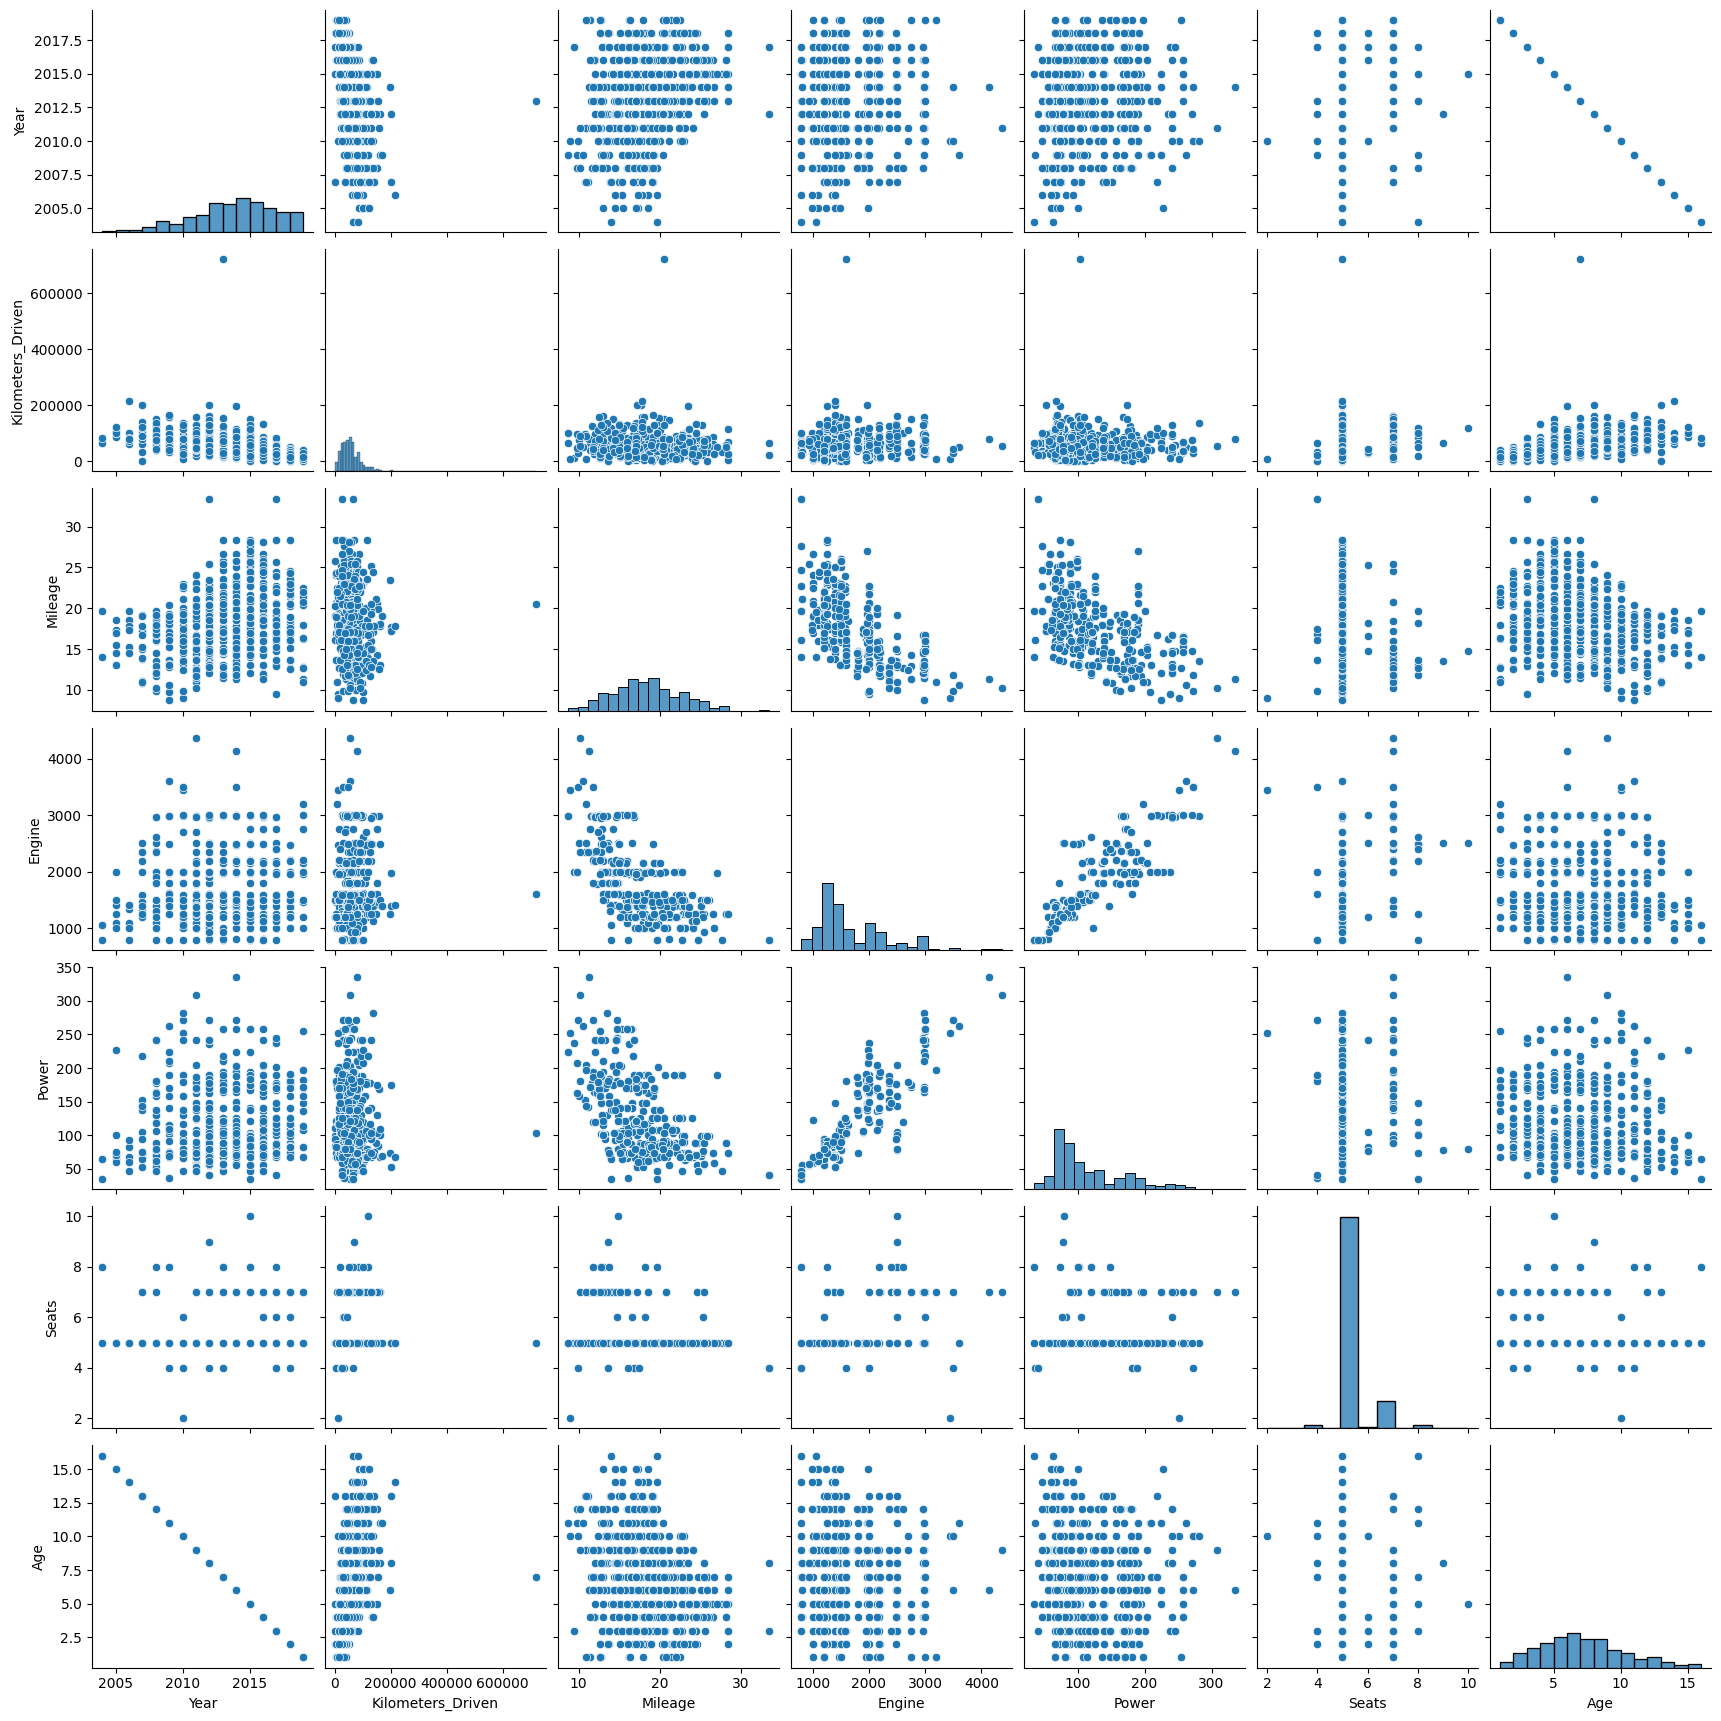

In [ ]:
sn.pairplot(test)

<H1>Checking for outliers:</H1>

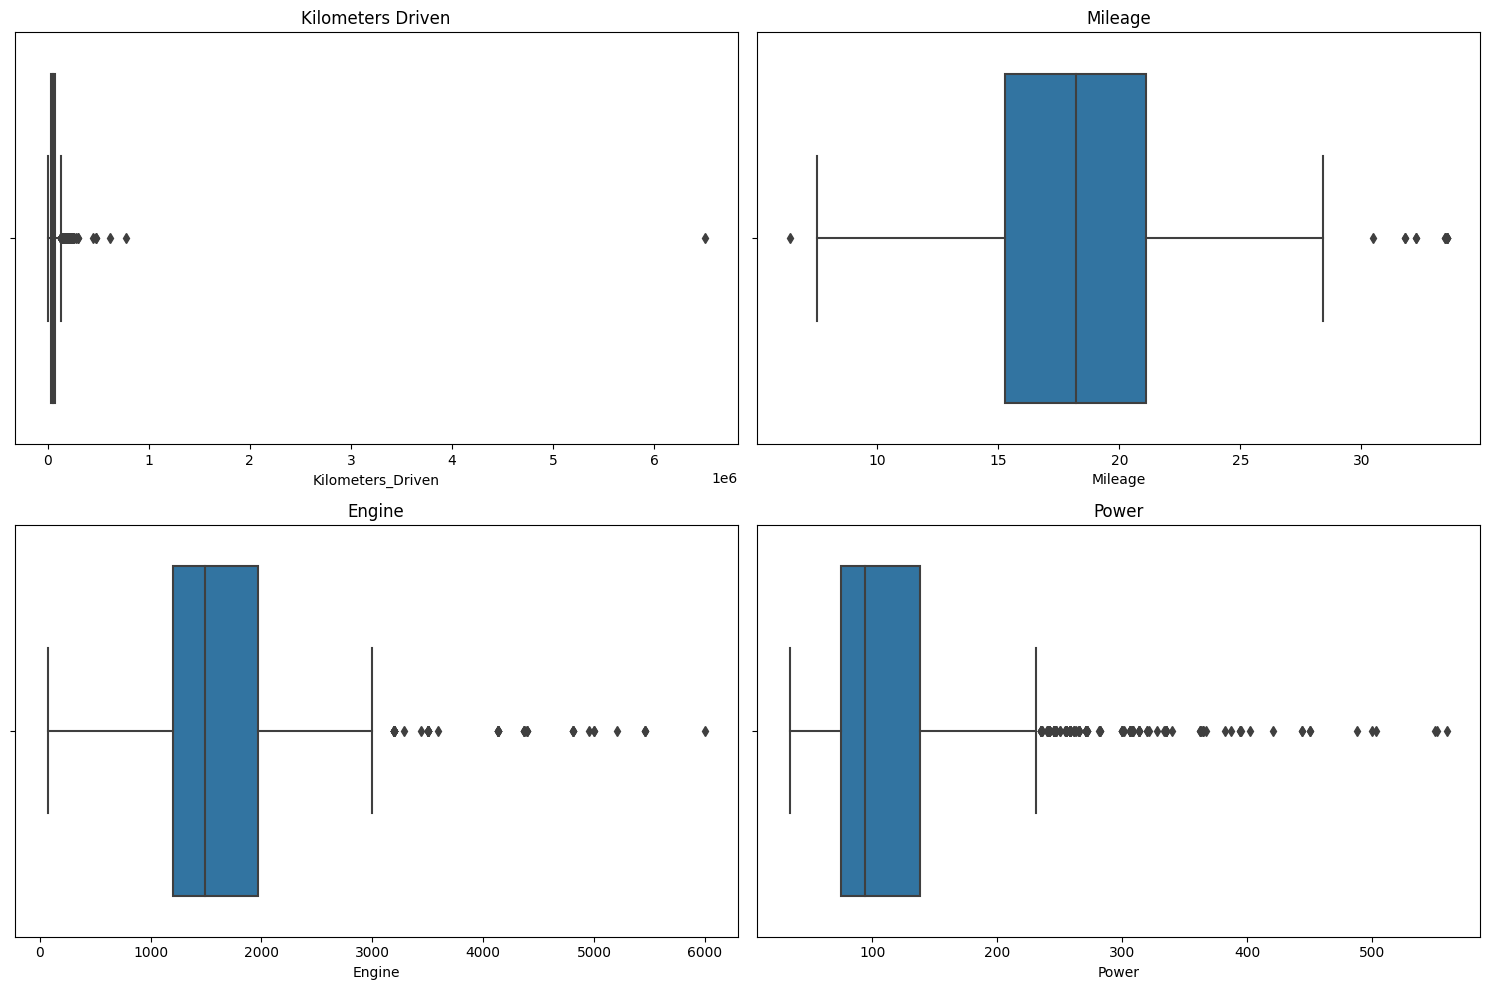

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=train, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=train, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=train, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=train, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


<h1>SCALING AND HANDLING OUTLIERS WITH ROBUST SCALAR:</H1>

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming 'train' is your DataFrame

# Selecting only the numeric columns
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']

# Creating a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the selected numeric columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

# Display the DataFrame after scaling
print(train.head())

                    Brand Location  Year  Kilometers_Driven Fuel_Type  \
0  Maruti Celerio VXI AMT    Delhi  2014          -0.463564    Petrol   
1         Audi Q5 2.0 TDI    Delhi  2013           0.454026    Diesel   
2        Toyota Etios VXD     Pune  2012           1.479667    Diesel   
3  Maruti Wagon R LXI CNG     Pune  2012           0.951462       CNG   
4  Maruti Wagon R AMT VXI   Jaipur  2016           0.393256    Petrol   

  Transmission Owner_Type   Mileage    Engine     Power  Seats  Selling_Price  \
0    Automatic     Second  0.843373 -0.642023 -0.422973    5.0           3.20   
1    Automatic      First -0.695353  0.616083  1.278756    5.0          21.50   
2       Manual      First  0.927711 -0.167315 -0.422021    5.0           4.75   
3       Manual      First  1.376936 -0.642023 -0.563224    5.0           2.90   
4    Automatic      First  0.397590 -0.642023 -0.423608    5.0           3.87   

   Brand1    Model    Version  Age  
0  maruti  Celerio    VXI AMT    6  


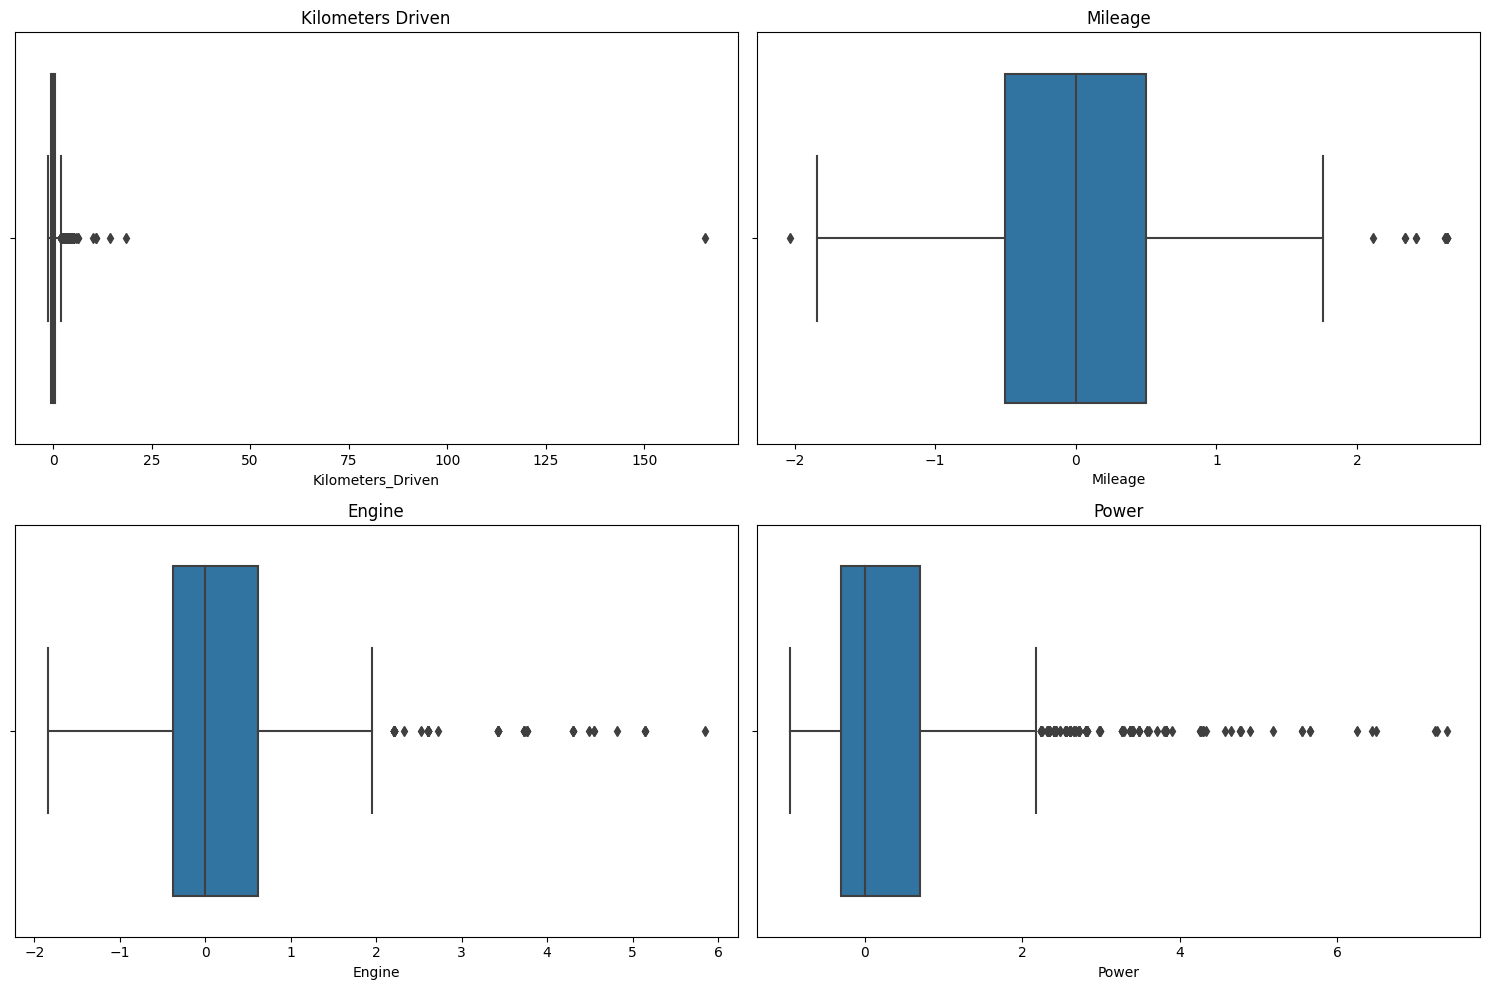

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=train, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=train, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=train, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=train, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version,Age
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.843373,-0.642023,-0.422973,5.0,3.20,maruti,Celerio,VXI AMT,6
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.695353,0.616083,1.278756,5.0,21.50,audi,Q5,2.0 TDI,7
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.927711,-0.167315,-0.422021,5.0,4.75,toyota,Etios,VXD,8
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.376936,-0.642023,-0.563224,5.0,2.90,maruti,Wagon,R LXI CNG,8
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.397590,-0.642023,-0.423608,5.0,3.87,maruti,Wagon,R AMT VXI,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,-0.674179,Petrol,Automatic,First,-0.039587,0.006485,0.093606,5.0,6.75,nissan,Sunny,2011-2014 XL AT Special Edition,5
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,-1.135718,Diesel,Automatic,First,-0.960413,0.914397,1.020149,7.0,32.90,ford,Endeavour,2.2 Titanium AT 4X2,1
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,2.223256,Diesel,Manual,Second,-0.533563,0.889754,0.734571,7.0,9.00,mahindra,XUV500,W8 2WD,7
5415,Honda Amaze S i-Dtech,Jaipur,2014,0.592846,Diesel,Manual,First,1.308090,0.006485,0.077741,5.0,4.95,honda,Amaze,S i-Dtech,6


<H5>TEST DATA </H5>

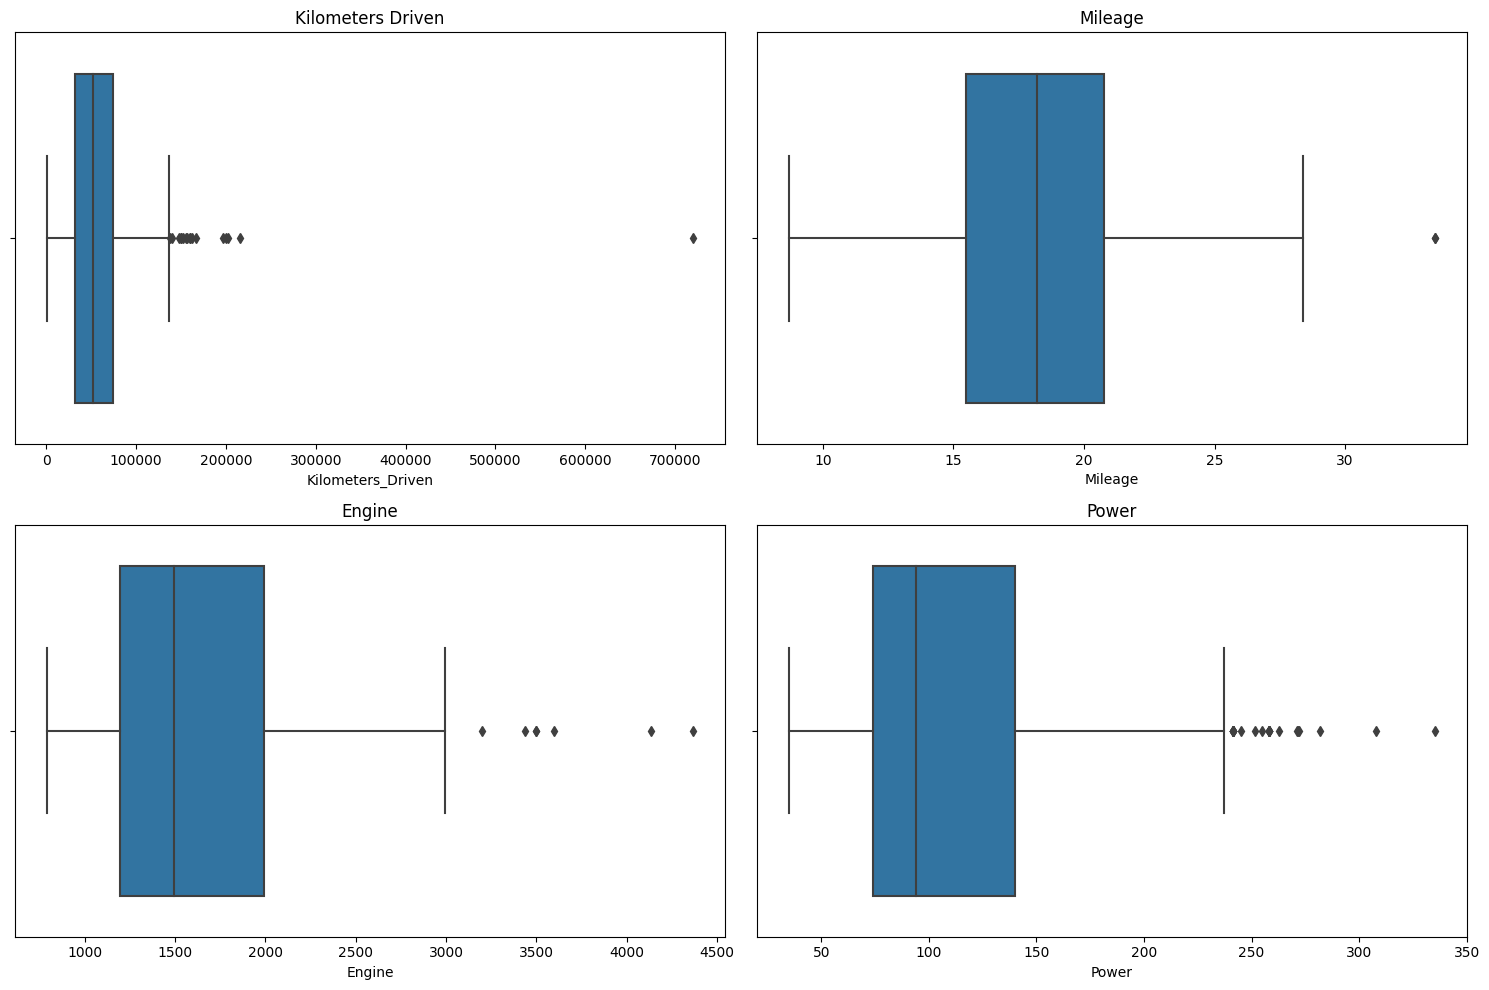

In [ ]:
# BEFORE SCALING

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=test_x, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=test_x, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=test_x, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=test_x, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler


# Selecting only the numeric columns
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']

# Creating a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the selected numeric columns
test_x[numeric_columns] = scaler.fit_transform(test_x[numeric_columns])

# Display the DataFrame after scaling
print(test_x.head())


                             Brand   Location  Year  Kilometers_Driven  \
0           Maruti Swift Dzire VDI  Hyderabad  2013           0.401285   
1    Mahindra Scorpio 1.99 S4 Plus      Kochi  2017          -0.606225   
2           Mahindra XUV500 W8 2WD      Delhi  2014           0.806587   
3               Tata Indigo CS eVX       Pune  2016          -0.004017   
4  Hyundai Santro GLS II - Euro II       Pune  2009           1.140366   

  Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0    Diesel       Manual      First  0.987666 -0.307403 -0.305909    5.0   
1    Diesel       Manual      First -0.530361  0.632371  0.391061    7.0   
2    Diesel       Manual      First -0.587287  0.860728  0.694091    7.0   
3    Diesel       Manual     Second  1.291271 -0.121706 -0.381515    5.0   
4    Petrol       Manual      First  0.035014  0.166591  0.311319    5.0   

     Brand1    Model           Version  Age  
0    maruti    Swift         Dzire VDI    7  
1  mah

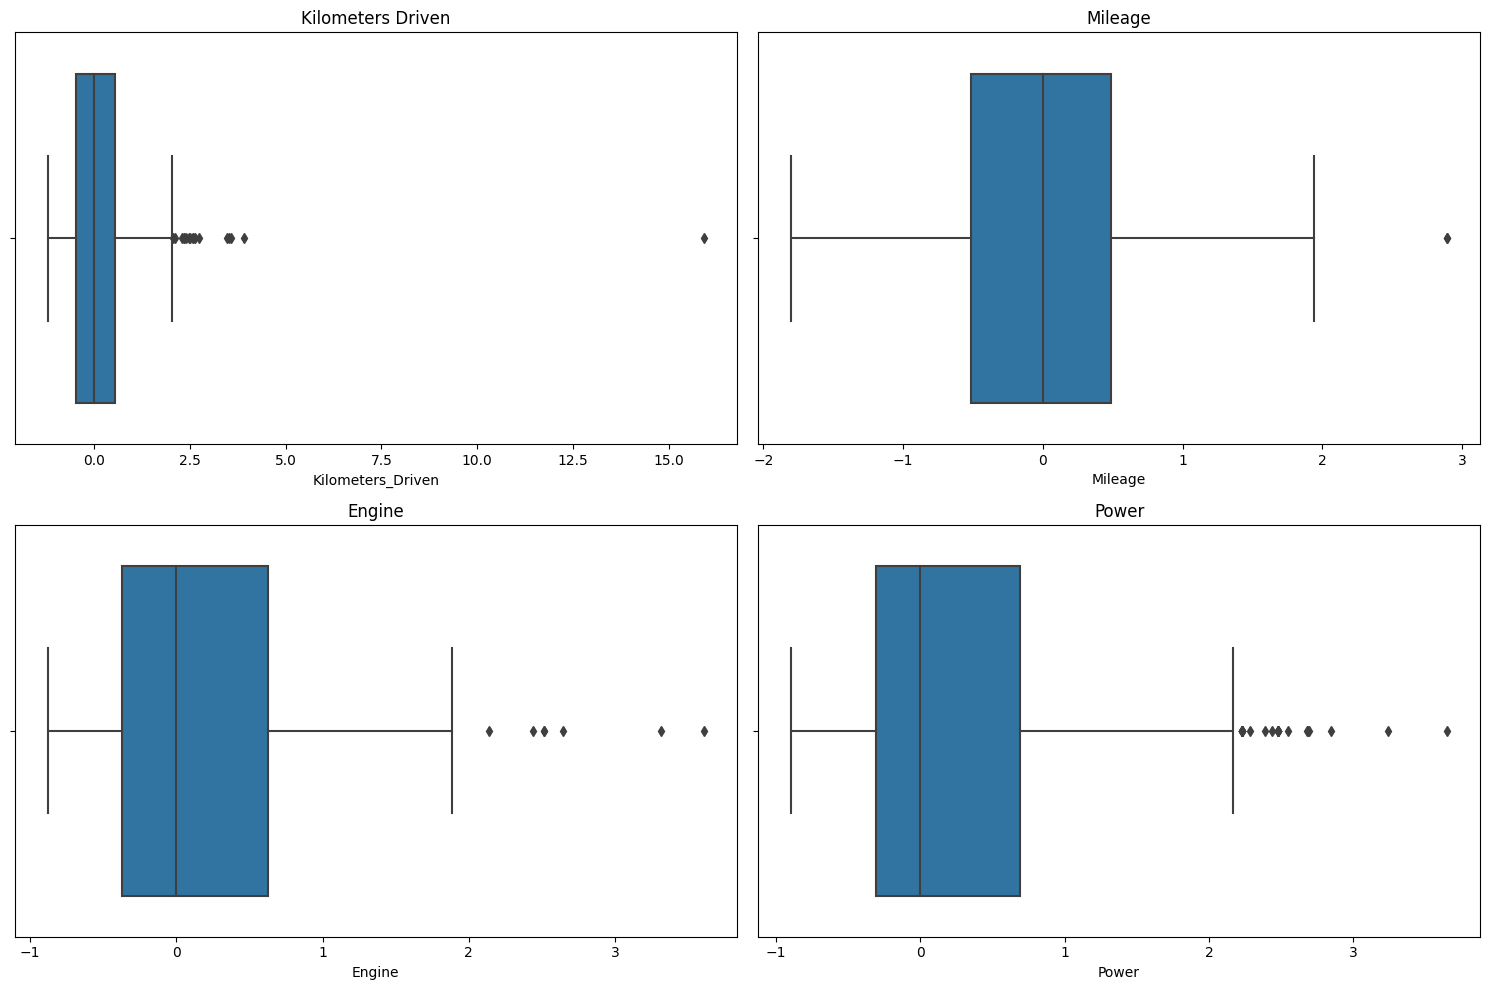

In [ ]:
# AFTER SCALING


import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=test_x, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=test_x, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=test_x, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=test_x, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: >

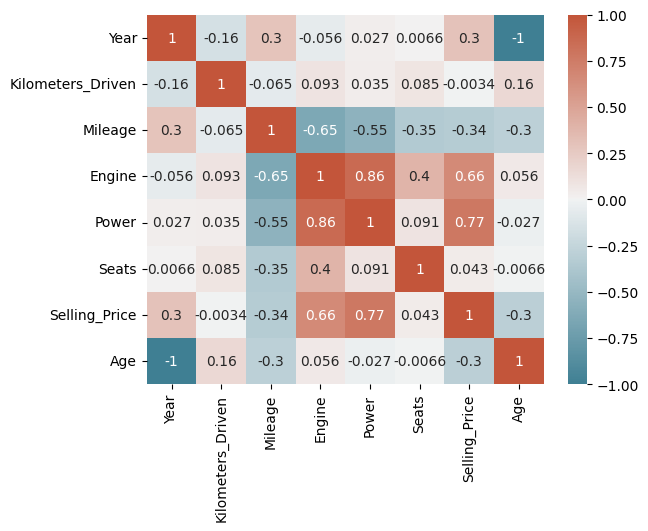

In [ ]:
# Exclude non-numeric columns from the DataFrame
numeric_train = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
corr = numeric_train.corr()

# Create a heatmap of the correlation matrix
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sn.diverging_palette(220, 20, as_cmap=True))


In [ ]:
pd.crosstab(train.Location, train.Owner_Type)

Owner_Type,First,Fourth & Above,Second,Third
Location,,,,
Ahmedabad,163,0,35,0
Bangalore,213,1,109,10
Chennai,298,2,106,33
Coimbatore,519,1,58,1
Delhi,422,0,87,3
Hyderabad,592,0,76,0
Jaipur,267,1,87,13
Kochi,540,0,32,3
Kolkata,448,0,27,0


In [ ]:
train.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Selling_Price', 'Brand1', 'Model', 'Version', 'Age'],
      dtype='object')

In [ ]:
print(train)

                                             Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type   Mileage    Engine  \
0             -0.463564    Petrol    Automatic     Second  0.84337

In [ ]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version,Age
0,Maruti Swift Dzire VDI,Hyderabad,2013,0.401285,Diesel,Manual,First,0.987666,-0.307403,-0.305909,5.0,maruti,Swift,Dzire VDI,7
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,-0.606225,Diesel,Manual,First,-0.530361,0.632371,0.391061,7.0,mahindra,Scorpio,1.99 S4 Plus,3
2,Mahindra XUV500 W8 2WD,Delhi,2014,0.806587,Diesel,Manual,First,-0.587287,0.860728,0.694091,7.0,mahindra,XUV500,W8 2WD,6
3,Tata Indigo CS eVX,Pune,2016,-0.004017,Diesel,Manual,Second,1.291271,-0.121706,-0.381515,5.0,tata,Indigo,CS eVX,4
4,Hyundai Santro GLS II - Euro II,Pune,2009,1.140366,Petrol,Manual,First,0.035014,0.166591,0.311319,5.0,hyundai,Santro,GLS II - Euro II,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,0.615857,Petrol,Automatic,Second,-0.695446,0.377666,0.665303,5.0,toyota,Corolla,Altis 2008-2013 1.8 VL AT,12
598,Hyundai i10 Magna 1.2,Chennai,2012,0.073014,Petrol,Manual,Second,0.410816,-0.371393,-0.231667,5.0,hyundai,i10,Magna 1.2,8
599,Maruti Swift Dzire VDi,Jaipur,2010,1.855605,Diesel,Manual,Second,0.209677,-0.307403,-0.307424,5.0,maruti,Swift,Dzire VDi,10
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,-0.302034,Diesel,Automatic,First,-0.606262,0.815558,1.663788,5.0,mercedes-benz,E-Class,2015-2017 E250 Edition E,4


In [ ]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Selling_Price,Age
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,2013.363670,0.141893,0.020730,0.165841,0.299963,5.279306,9.453670,6.636330
std,3.283659,2.438930,0.718628,0.780693,0.854412,0.805769,11.166658,3.283659
min,1998.000000,-1.362103,-2.030981,-1.843061,-0.943995,2.000000,0.440000,1.000000
25%,2011.000000,-0.494692,-0.500861,-0.382620,-0.296684,5.000000,3.500000,4.000000
50%,2014.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.650000,6.000000
75%,2016.000000,0.505308,0.499139,0.617380,0.703316,5.000000,9.900000,9.000000
max,2019.000000,165.300179,2.640275,5.843061,7.398064,10.000000,160.000000,22.000000


In [ ]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Age
count,600.00000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.00000
mean,2013.33500,0.134994,0.028727,0.167836,3.099007e-01,5.268333,6.66500
std,3.11324,1.033601,0.780627,0.737538,8.017530e-01,0.772869,3.11324
min,2004.00000,-1.219924,-1.801708,-0.878294,-8.968182e-01,2.000000,1.00000
25%,2011.75000,-0.473548,-0.511385,-0.370138,-3.059091e-01,5.000000,4.00000
50%,2014.00000,0.000000,0.000000,0.000000,1.075529e-16,5.000000,6.00000
75%,2016.00000,0.526452,0.488615,0.629862,6.940909e-01,5.000000,8.25000
max,2019.00000,15.921979,2.892789,3.606023,3.651667e+00,10.000000,16.00000


<h1> ONE HOT ENCODING </h1>

In [ ]:
train.dtypes

Brand                 object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Selling_Price        float64
Brand1                object
Model                 object
Version               object
Age                    int64
dtype: object

In [ ]:
test.dtypes

Brand                 object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand1                object
Model                 object
Version               object
Age                    int64
dtype: object

In [ ]:
#Creating dummy dataframe to create map of all possible unique column names provided in train and test files

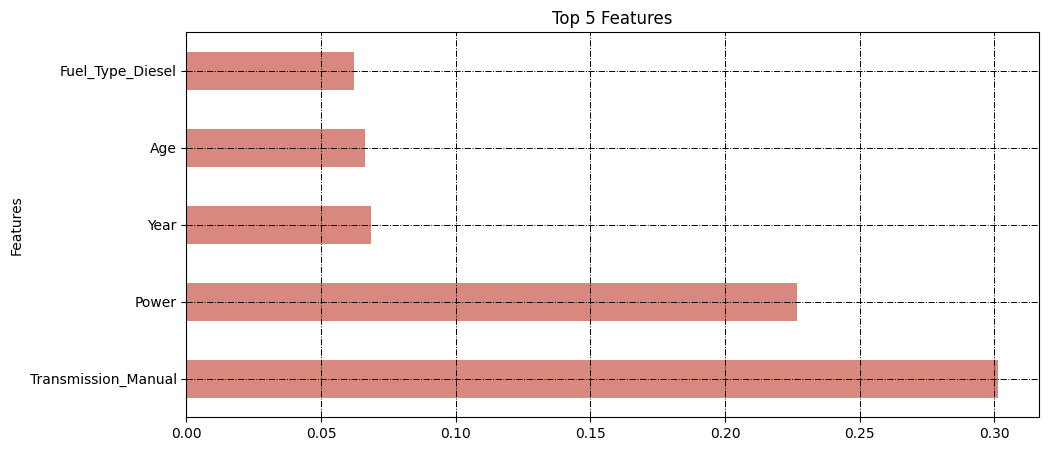

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt



df3_inputs = train.drop('Selling_Price', axis=1)
df3_target = train['Selling_Price']

# Identify categorical columns
categorical_columns = df3_inputs.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
df3_inputs_encoded = pd.DataFrame(onehot_encoder.fit_transform(df3_inputs[categorical_columns]))

# Get the feature names after one-hot encoding
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
df3_inputs_encoded.columns = feature_names

# Concatenate the one-hot encoded features with the remaining numeric features
df3_inputs = pd.concat([df3_inputs.drop(columns=categorical_columns), df3_inputs_encoded], axis=1)

# Initialize the ExtraTreesRegressor
model = ExtraTreesRegressor()

# Fit the model on the training data
model.fit(df3_inputs, df3_target)

# Use inbuilt class feature_importances of ExtraTreeRegressor
feat_importances = pd.Series(model.feature_importances_, index=df3_inputs.columns)

# Plot graph of feature importances for better visualization
plt.figure(figsize=(11, 5))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 5 Features")
feat_importances.nlargest(5).plot(kind='barh', color='#D98880')  # You can change the color as desired
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

In [ ]:
train.head

<bound method NDFrame.head of                                              Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type   Mileage    Engine  \
0             -0.463564    Petrol   

In [ ]:
test.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version,Age
0,Maruti Swift Dzire VDI,Hyderabad,2013,0.401285,Diesel,Manual,First,0.987666,-0.307403,-0.305909,5.0,maruti,Swift,Dzire VDI,7
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,-0.606225,Diesel,Manual,First,-0.530361,0.632371,0.391061,7.0,mahindra,Scorpio,1.99 S4 Plus,3
2,Mahindra XUV500 W8 2WD,Delhi,2014,0.806587,Diesel,Manual,First,-0.587287,0.860728,0.694091,7.0,mahindra,XUV500,W8 2WD,6
3,Tata Indigo CS eVX,Pune,2016,-0.004017,Diesel,Manual,Second,1.291271,-0.121706,-0.381515,5.0,tata,Indigo,CS eVX,4
4,Hyundai Santro GLS II - Euro II,Pune,2009,1.140366,Petrol,Manual,First,0.035014,0.166591,0.311319,5.0,hyundai,Santro,GLS II - Euro II,11


In [ ]:
# List all the column names
columns = train.columns
print(columns)


Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Selling_Price', 'Brand1', 'Model', 'Version', 'Age'],
      dtype='object')


In [ ]:
# List all the column names
columns = test.columns
print(columns)

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand1', 'Model', 'Version', 'Age'],
      dtype='object')


In [ ]:
#import pandas as pd

# Perform one-hot encoding on categorical columns in the train set
train_encoded = pd.get_dummies(train, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand1'])

# Perform one-hot encoding on categorical columns in the test set
test_encoded = pd.get_dummies(test, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand1'])

# Display the first few rows of the encoded train dataset
print(train_encoded.head())

# Display the first few rows of the encoded test dataset
print(test_encoded.head())


                    Brand  Year  Kilometers_Driven   Mileage    Engine  \
0  Maruti Celerio VXI AMT  2014          -0.463564  0.843373 -0.642023   
1         Audi Q5 2.0 TDI  2013           0.454026 -0.695353  0.616083   
2        Toyota Etios VXD  2012           1.479667  0.927711 -0.167315   
3  Maruti Wagon R LXI CNG  2012           0.951462  1.376936 -0.642023   
4  Maruti Wagon R AMT VXI  2016           0.393256  0.397590 -0.642023   

      Power  Seats  Selling_Price    Model    Version  ...  Brand1_mini  \
0 -0.422973    5.0           3.20  Celerio    VXI AMT  ...            0   
1  1.278756    5.0          21.50       Q5    2.0 TDI  ...            0   
2 -0.422021    5.0           4.75    Etios        VXD  ...            0   
3 -0.563224    5.0           2.90    Wagon  R LXI CNG  ...            0   
4 -0.423608    5.0           3.87    Wagon  R AMT VXI  ...            0   

   Brand1_mitsubishi  Brand1_nissan  Brand1_porsche  Brand1_renault  \
0                  0             

In [ ]:
# Select only numeric columns for correlation analysis
numeric_columns = train_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_encoded[numeric_columns].corr()

# Sort and get the correlation with the target variable
correlation_with_target = correlation_matrix['Selling_Price'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[1:].index

# Print correlation values
print("Correlation with Selling_Price:")
print(correlation_with_target)


Correlation with Selling_Price:
Selling_Price        1.000000
Power                0.774092
Engine               0.656758
Mileage              0.335400
Age                  0.301162
Year                 0.301162
Seats                0.043381
Kilometers_Driven    0.003430
Name: Selling_Price, dtype: float64


In [ ]:
# Specify the categorical columns for one-hot encoding based on top features
columns_to_encode = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding on the training data with 1s and 0s
train_encoded = pd.get_dummies(train, columns=columns_to_encode)

# Perform one-hot encoding on the test data with 1s and 0s
test_encoded = pd.get_dummies(test, columns=columns_to_encode)


In [ ]:
train_encoded.columns

Index(['Brand', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Selling_Price', 'Brand1', 'Model', 'Version', 'Age',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [ ]:
test_encoded.columns

Index(['Brand', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand1', 'Model', 'Version', 'Age', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [ ]:
train_copy=train_encoded
train_copy

,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Celerio VXI AMT,2014,-0.463564,0.843373,-0.642023,-0.422973,5.0,3.20,maruti,Celerio,...,0,0,0,1,1,0,0,0,1,0
1,Audi Q5 2.0 TDI,2013,0.454026,-0.695353,0.616083,1.278756,5.0,21.50,audi,Q5,...,1,0,0,0,1,0,1,0,0,0
2,Toyota Etios VXD,2012,1.479667,0.927711,-0.167315,-0.422021,5.0,4.75,toyota,Etios,...,1,0,0,0,0,1,1,0,0,0
3,Maruti Wagon R LXI CNG,2012,0.951462,1.376936,-0.642023,-0.563224,5.0,2.90,maruti,Wagon,...,0,0,0,0,0,1,1,0,0,0
4,Maruti Wagon R AMT VXI,2016,0.393256,0.397590,-0.642023,-0.423608,5.0,3.87,maruti,Wagon,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,2015,-0.674179,-0.039587,0.006485,0.093606,5.0,6.75,nissan,Sunny,...,0,0,0,1,1,0,1,0,0,0
5413,Ford Endeavour 2.2 Titanium AT 4X2,2019,-1.135718,-0.960413,0.914397,1.020149,7.0,32.90,ford,Endeavour,...,1,0,0,0,1,0,1,0,0,0
5414,Mahindra XUV500 W8 2WD,2013,2.223256,-0.533563,0.889754,0.734571,7.0,9.00,mahindra,XUV500,...,1,0,0,0,0,1,0,0,1,0
5415,Honda Amaze S i-Dtech,2014,0.592846,1.308090,0.006485,0.077741,5.0,4.95,honda,Amaze,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
test_copy=test_encoded
test_copy

,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand1,Model,Version,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Swift Dzire VDI,2013,0.401285,0.987666,-0.307403,-0.305909,5.0,maruti,Swift,Dzire VDI,...,1,0,0,0,0,1,1,0,0,0
1,Mahindra Scorpio 1.99 S4 Plus,2017,-0.606225,-0.530361,0.632371,0.391061,7.0,mahindra,Scorpio,1.99 S4 Plus,...,1,0,0,0,0,1,1,0,0,0
2,Mahindra XUV500 W8 2WD,2014,0.806587,-0.587287,0.860728,0.694091,7.0,mahindra,XUV500,W8 2WD,...,1,0,0,0,0,1,1,0,0,0
3,Tata Indigo CS eVX,2016,-0.004017,1.291271,-0.121706,-0.381515,5.0,tata,Indigo,CS eVX,...,1,0,0,0,0,1,0,0,1,0
4,Hyundai Santro GLS II - Euro II,2009,1.140366,0.035014,0.166591,0.311319,5.0,hyundai,Santro,GLS II - Euro II,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,2008,0.615857,-0.695446,0.377666,0.665303,5.0,toyota,Corolla,Altis 2008-2013 1.8 VL AT,...,0,0,0,1,1,0,0,0,1,0
598,Hyundai i10 Magna 1.2,2012,0.073014,0.410816,-0.371393,-0.231667,5.0,hyundai,i10,Magna 1.2,...,0,0,0,1,0,1,0,0,1,0
599,Maruti Swift Dzire VDi,2010,1.855605,0.209677,-0.307403,-0.307424,5.0,maruti,Swift,Dzire VDi,...,1,0,0,0,0,1,0,0,1,0
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,2016,-0.302034,-0.606262,0.815558,1.663788,5.0,mercedes-benz,E-Class,2015-2017 E250 Edition E,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
test_copy.columns

Index(['Brand', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand1', 'Model', 'Version', 'Age', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [ ]:
test_data = test_copy[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Age', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]

In [ ]:
X

NameError: ignored

In [ ]:
test_copy

<h1> TRAINING THE DATA USING VARIOUS REGRESSION MODELS </h1>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'train_copy' is your dataframe
X = train_copy[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
                'Age', 'Location_Ahmedabad', 'Location_Bangalore',
                'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
                'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
                'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
                'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
                'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
                'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
                'Owner_Type_Third']]
y = train_copy.Selling_Price

# Splitting the data into training, testing, and validation sets
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Create pipelines for each model without scaling
linreg_pipe = Pipeline([
    ('model', LinearRegression())
])

lasso_pipe = Pipeline([
    ('model', Lasso())
])

ridge_pipe = Pipeline([
    ('model', Ridge())
])

rf_pipe = Pipeline([
    ('model', RandomForestRegressor())
])

gbr_pipe = Pipeline([
    ('model', GradientBoostingRegressor())
])

ada_pipe = Pipeline([
    ('model', AdaBoostRegressor())
])

svr_pipe = Pipeline([
    ('model', SVR())
])

knn_pipe = Pipeline([
    ('model', KNeighborsRegressor())
])

dt_pipe = Pipeline([
    ('model', DecisionTreeRegressor())
])

xgb_pipe = Pipeline([
    ('model', XGBRegressor())
])

# Define parameter grids for each model
param_grid_linreg = {
    #'model__normalize': [True, False]
}

param_grid_lasso = {
    'model__alpha': [0.1, 1, 10]
}

param_grid_ridge = {
    'model__alpha': [0.1, 1, 10, 100]
}

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

param_grid_gbr = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

param_grid_ada = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_svr = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

param_grid_dt = {
    'model__criterion': ['mse', 'friedman_mse', 'mae'],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [10, 20, 30, 40],
    'model__ccp_alpha': [0.001, 0.01, 0.1]
}

param_grid_xgb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Create a dictionary of pipelines and parameter grids
pipelines = {
    'Linear Regression': (linreg_pipe, param_grid_linreg),
    'Lasso Regression': (lasso_pipe, param_grid_lasso),
    'Ridge Regression': (ridge_pipe, param_grid_ridge),
    'Random Forest': (rf_pipe, param_grid_rf),
    'Gradient Boosting': (gbr_pipe, param_grid_gbr),
    'AdaBoost': (ada_pipe, param_grid_ada),
    'SVR': (svr_pipe, param_grid_svr),
    'KNN': (knn_pipe, param_grid_knn),
    'Decision Tree': (dt_pipe, param_grid_dt),
    'XGBoost': (xgb_pipe, param_grid_xgb)
}

# Fit models using GridSearchCV and print results
results = {}
for model_name, (pipeline, param_grid) in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_temp, y_train_temp)

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R^2 Score': r2
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name}:\n{result}\n")


Linear Regression:
{'Best Parameters': {}, 'Mean Squared Error': 35.27524446898408, 'Mean Absolute Error': 3.6713141634936766, 'Root Mean Squared Error': 5.93929663082962, 'R^2 Score': 0.7181521823387245}

Lasso Regression:
{'Best Parameters': {'model__alpha': 1}, 'Mean Squared Error': 41.15028499977052, 'Mean Absolute Error': 3.8819181886529766, 'Root Mean Squared Error': 6.414848790094005, 'R^2 Score': 0.6712108392750462}

Ridge Regression:
{'Best Parameters': {'model__alpha': 100}, 'Mean Squared Error': 35.55845739390777, 'Mean Absolute Error': 3.6542528667242884, 'Root Mean Squared Error': 5.963091261577989, 'R^2 Score': 0.7158893221934632}

Random Forest:
{'Best Parameters': {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}, 'Mean Squared Error': 14.616761532300524, 'Mean Absolute Error': 1.613765726093335, 'Root Mean Squared Error': 3.8231873524979814, 'R^2 Score': 0.8832126495175263}

Gradient Boosting:
{'Best Parame

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'X' and 'y' are your features and target variable
X = train_copy[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
                'Age', 'Location_Ahmedabad', 'Location_Bangalore',
                'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
                'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
                'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
                'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
                'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
                'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
                'Owner_Type_Third']]
y = train_copy.Selling_Price

# Splitting the data into training, testing, and validation sets
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Perform mutual information-based feature selection
mi = mutual_info_regression(X_train_temp, y_train_temp)
selected_features = X_train_temp.columns[mi > 0]

# Update X_train_temp, X_test, and X_val with selected features
X_train_temp = X_train_temp[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

# Create pipelines for each model without scaling
linreg_pipe = Pipeline([
    ('model', LinearRegression())
])

lasso_pipe = Pipeline([
    ('model', Lasso())
])

ridge_pipe = Pipeline([
    ('model', Ridge())
])

rf_pipe = Pipeline([
    ('model', RandomForestRegressor())
])

gbr_pipe = Pipeline([
    ('model', GradientBoostingRegressor())
])

ada_pipe = Pipeline([
    ('model', AdaBoostRegressor())
])

svr_pipe = Pipeline([
    ('model', SVR())
])

knn_pipe = Pipeline([
    ('model', KNeighborsRegressor())
])

dt_pipe = Pipeline([
    ('model', DecisionTreeRegressor())
])

xgb_pipe = Pipeline([
    ('model', XGBRegressor())
])

# Define parameter grids for each model
param_grid_linreg = {
    #'model__normalize': [True, False]
}

param_grid_lasso = {
    'model__alpha': [0.1, 1, 10]
}

param_grid_ridge = {
    'model__alpha': [0.1, 1, 10, 100]
}

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

param_grid_gbr = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

param_grid_ada = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_svr = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

param_grid_dt = {
    'model__criterion': ['mse', 'friedman_mse', 'mae'],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [10, 20, 30, 40],
    'model__ccp_alpha': [0.001, 0.01, 0.1]
}

param_grid_xgb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Create a dictionary of pipelines and parameter grids
pipelines = {
    'Linear Regression': (linreg_pipe, param_grid_linreg),
    'Lasso Regression': (lasso_pipe, param_grid_lasso),
    'Ridge Regression': (ridge_pipe, param_grid_ridge),
    'Random Forest': (rf_pipe, param_grid_rf),
    'Gradient Boosting': (gbr_pipe, param_grid_gbr),
    'AdaBoost': (ada_pipe, param_grid_ada),
    'SVR': (svr_pipe, param_grid_svr),
    'KNN': (knn_pipe, param_grid_knn),
    'Decision Tree': (dt_pipe, param_grid_dt),
    'XGBoost': (xgb_pipe, param_grid_xgb)
}

# Fit models using GridSearchCV and print results
results = {}
for model_name, (pipeline, param_grid) in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_temp, y_train_temp)

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R^2 Score': r2
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name}:\n{result}\n")


In [ ]:
test_copy.dtypes

In [ ]:
test_copy

In [ ]:
X.dtypes

In [ ]:
test_copy.columns

In [ ]:
train_copy.columns

In [ ]:
X.columns

<h1>FINAL PREDICTION<h1> <h2>USIING XGB, RF AND GB MODLE</h2>

In [ ]:
import os
import pandas as pd

ordered_columns = X_train_temp.columns

# Reorder the columns in test_copy
test_copy_ordered = test_copy[ordered_columns]

# Prediction on the test set of the provided 'test_copy' for XGBoost
prediction_xgb = grid_search.best_estimator_.predict(test_copy_ordered)
sol_xgb = pd.DataFrame({'Selling_Price_XGB': prediction_xgb})

# Save predictions to a text file for XGBoost
folder_path = r'C:\Users\Ishanya\Desktop\DSML Project\1\data\RAWDATA'
sol_xgb.to_csv(os.path.join(folder_path, 'Ishanya_predictions_xgb.txt'), index=False, header=True, sep='\t')

# Save predictions to an Excel file for XGBoost
sol_xgb.to_excel(os.path.join(folder_path, 'Ishanya_predictions_xgb.xlsx'), index=False)

In [ ]:
# Assuming X_train contains the training features used for training the Random Forest model
ordered_columns_rf = X_train_temp.columns

# Reorder the columns in test_copy
test_copy_ordered_rf = test_copy[ordered_columns_rf]

# Prediction on the test set of the provided 'test_copy' for Random Forest
prediction_rf = grid_search.best_estimator_.predict(test_copy_ordered_rf)
sol_rf = pd.DataFrame({'Selling_Price_RF': prediction_rf})

# Save predictions to a text file for Random Forest
folder_path_rf = r'C:\Users\Ishanya\Desktop\DSML Project\1\data\RAWDATA'
sol_rf.to_csv(os.path.join(folder_path_rf, 'Ishanya_predictions_rf.txt'), index=False, header=True, sep='\t')

# Save predictions to an Excel file for Random Forest
sol_rf.to_excel(os.path.join(folder_path_rf, 'Ishanya_predictions_rf.xlsx'), index=False)


In [ ]:
# Assuming X_train contains the training features used for training the Gradient Boosting model
ordered_columns_gbr = X_train_temp.columns

# Reorder the columns in test_copy
test_copy_ordered_gbr = test_copy[ordered_columns_gbr]

# Prediction on the test set of the provided 'test_copy' for Gradient Boosting
prediction_gbr = grid_search.best_estimator_.predict(test_copy_ordered_gbr)
sol_gbr = pd.DataFrame({'Selling_Price_GBR': prediction_gbr})

# Save predictions to a text file for Gradient Boosting
folder_path_gbr = r'C:\Users\Ishanya\Desktop\DSML Project\1\data\RAWDATA'
sol_gbr.to_csv(os.path.join(folder_path_gbr, 'Ishanya_predictions_gbr.txt'), index=False, header=True, sep='\t')

# Save predictions to an Excel file for Gradient Boosting
sol_gbr.to_excel(os.path.join(folder_path_gbr, 'Ishanya_predictions_gbr.xlsx'), index=False)